In [1]:
import sys

full_path_to_modul_dir = 'D:\mcbj_stmbj'  # here enter the full path to the directory that contains the modul on your computer
sys.path.append(full_path_to_modul_dir)

In [2]:
from mcbj import *
from tqdm.notebook import tqdm
import filter_traces
import plots
import re
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm, colormaps, cycler, rcParams, gridspec, ticker
import utils

date = "22_02_03"
sample_rate = 50_000
home_folder = Path(f"D:/BJ_Data/{date}")
# home_folder = Path(f"//DATACENTER/BreakJunction_group/BJ_Data/{date}")

In [3]:
rcParams['figure.constrained_layout.use'] = False
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'stix'
rcParams['mathtext.rm'] = 'serif'
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['xtick.major.pad'] = 4
rcParams['xtick.minor.pad'] = 0.5
rcParams['ytick.major.pad'] = 2
rcParams['ytick.minor.pad'] = 0.5
rcParams['axes.labelsize'] = 10
rcParams['axes.titlepad'] = 8.0
rcParams['axes.labelpad'] = 2.0
rcParams['agg.path.chunksize'] = 10000

In [4]:
rcParams['font.size'] = 14
rcParams['ytick.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['axes.labelsize'] = 10

In [5]:
home_folder.joinpath('results/IVs/selected')

WindowsPath('D:/BJ_Data/22_02_03/results/IVs/selected')

In [5]:
hold_off_traces = [np.arange(301, 3133, 1),
                   np.arange(3133, 16101, 1),
                   np.arange(16101, 19501, 1),
                   np.arange(25801, 26901, 1),
                   np.arange(29001, 30501, 1),
                   np.arange(32201, 33601, 1),
                   np.arange(38201, 40101, 1),
                   np.arange(43301, 49101, 1),
                   np.arange(49101, 61500, 1)]

In [6]:
hold_off_hists = []

for traces in hold_off_traces:
    hold_off_hists.append(Histogram(folder=home_folder,
                                    traces=traces,
                                    conductance_range=(1e-5, 10),
                                    conductance_bins_num=20,
                                    conductance_bins_mode='decade'))
    hold_off_hists[-1].calc_stats(align_at=0.1,
                                  range_pull=(-0.05, 0.2),
                                  range_push=(-0.5, 1.2))

  0%|          | 0/2832 [00:00<?, ?it/s]

Pull 2D histogram created from 2831 traces
Push 2D histogram created from 2831 traces


  0%|          | 0/12968 [00:00<?, ?it/s]

Pull 2D histogram created from 12968 traces
Push 2D histogram created from 12968 traces


  0%|          | 0/3400 [00:00<?, ?it/s]

Pull 2D histogram created from 3400 traces
Push 2D histogram created from 3400 traces


  0%|          | 0/1100 [00:00<?, ?it/s]

Pull 2D histogram created from 1100 traces
Push 2D histogram created from 1100 traces


  0%|          | 0/1500 [00:00<?, ?it/s]

Pull 2D histogram created from 1500 traces
Push 2D histogram created from 1500 traces


  0%|          | 0/1400 [00:00<?, ?it/s]

Pull 2D histogram created from 1400 traces
Push 2D histogram created from 1400 traces


  0%|          | 0/1900 [00:00<?, ?it/s]

Pull 2D histogram created from 1900 traces
Push 2D histogram created from 1900 traces


  0%|          | 0/5800 [00:00<?, ?it/s]

Pull 2D histogram created from 5800 traces
Push 2D histogram created from 5800 traces


  0%|          | 0/12399 [00:00<?, ?it/s]

Pull 2D histogram created from 12399 traces
Push 2D histogram created from 12399 traces


(<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance $[G_{0}]$'>,
 <AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance $[G_{0}]$'>)

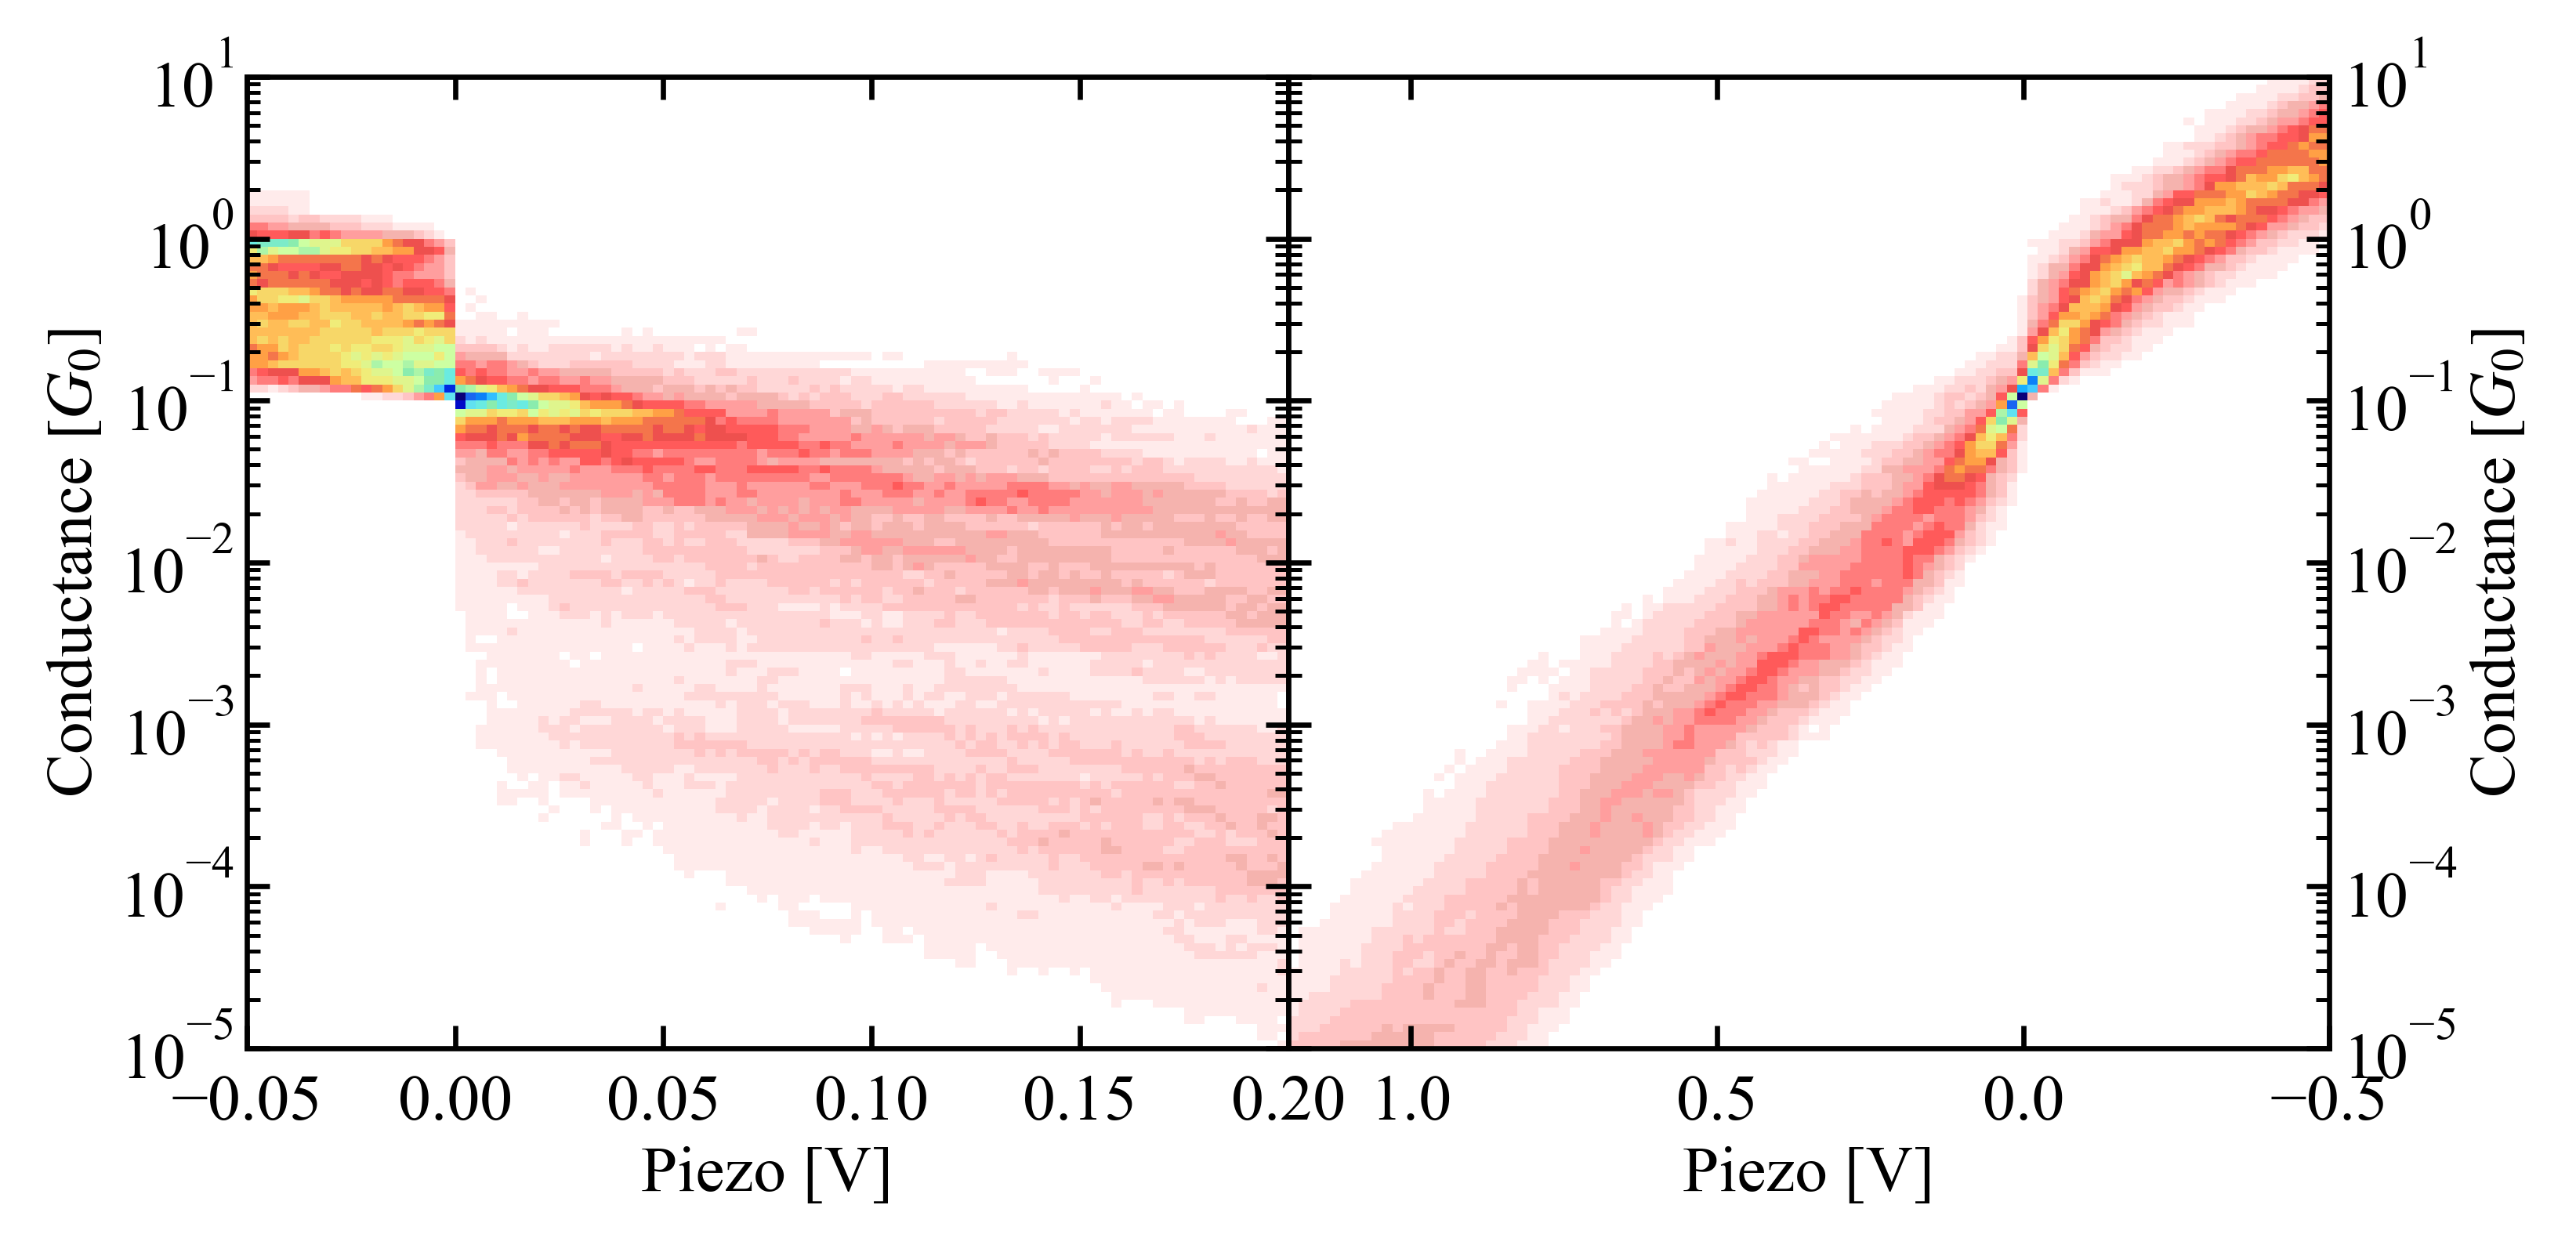

In [73]:
hold_off_hists[3].plot_hist_2d_both()

In [76]:
hold_off_traces

[array([ 301,  302,  303, ..., 3130, 3131, 3132]),
 array([ 3133,  3134,  3135, ..., 16098, 16099, 16100]),
 array([16101, 16102, 16103, ..., 19498, 19499, 19500]),
 array([25801, 25802, 25803, ..., 26898, 26899, 26900]),
 array([29001, 29002, 29003, ..., 30498, 30499, 30500]),
 array([32201, 32202, 32203, ..., 33598, 33599, 33600]),
 array([38201, 38202, 38203, ..., 40098, 40099, 40100]),
 array([43301, 43302, 43303, ..., 49098, 49099, 49100]),
 array([49101, 49102, 49103, ..., 61497, 61498, 61499])]

<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>

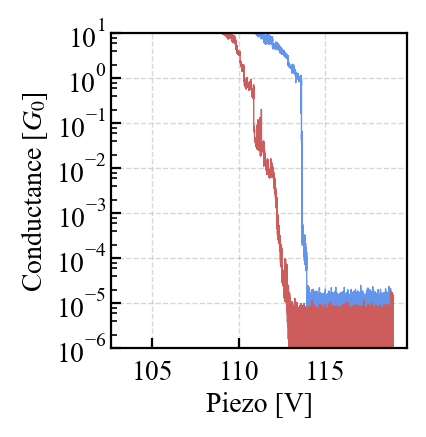

In [89]:
trace_pair = TracePair(hold_off_traces[0][12], load_from=home_folder)
trace_pair.plot_trace_pair(dpi=200)

9


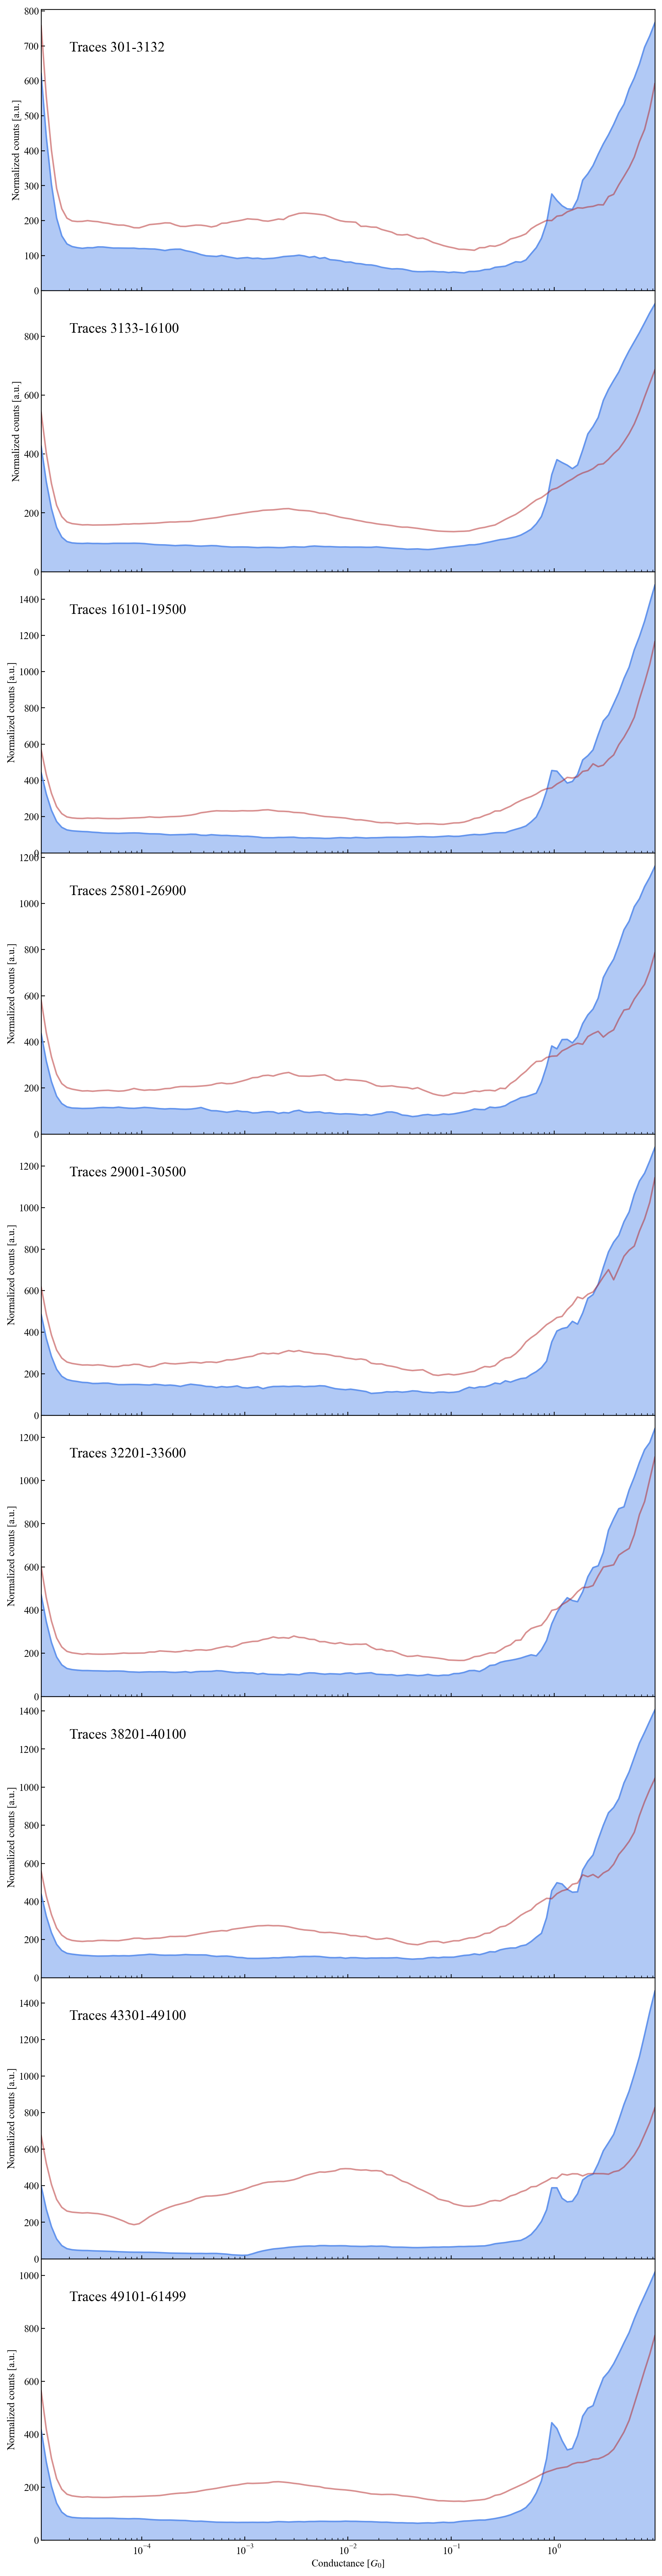

In [12]:
print(len(hold_off_hists))
figsize=(10, 5*len(hold_off_hists))
dpi=200
fig = plt.figure(figsize=figsize, dpi=dpi)
gs = plt.GridSpec(len(hold_off_hists), 1, figure=fig,
                  left=0.08, right=0.92, top=0.9, bottom=0.13,
                  hspace=0, wspace=0.2)

ax_hists = []
for i, hist in enumerate(hold_off_hists):
    ax_hists.append(fig.add_subplot(gs[i]))
    
    hist.plot_hist_1d(ax=ax_hists[i], dpi=dpi)
    ax_hists[i].text(x=2e-5, y=0.85*ax_hists[i].get_ylim()[1], s=f'Traces {hold_off_traces[i][0]}-{hold_off_traces[i][-1]}', )
    
plt.show()

In [13]:
hold_on_traces = [np.arange(19502, 25701, 1),
                  np.arange(26901, 29001, 1),
                  np.arange(30501, 32201, 1),
                  np.arange(33601, 38201, 1),
                  np.arange(40101, 43301, 1),
                  np.arange(44301, 49101, 1)]

In [14]:
hold_on_hists = []

for traces in hold_on_traces:
    hold_on_hists.append(Histogram(folder=home_folder,
                                   traces=traces,
                                   conductance_range=(1e-5, 10),
                                   conductance_bins_num=20,
                                   conductance_bins_mode='decade'))
    hold_on_hists[-1].calc_stats(align_at=0.1,
                                 range_pull=(-0.05, 0.2),
                                 range_push=(-0.5, 1.2))

  0%|          | 0/6199 [00:00<?, ?it/s]

Pull 2D histogram created from 6199 traces
Push 2D histogram created from 6199 traces


  0%|          | 0/2100 [00:00<?, ?it/s]

Pull 2D histogram created from 2100 traces
Push 2D histogram created from 2100 traces


  0%|          | 0/1700 [00:00<?, ?it/s]

Pull 2D histogram created from 1700 traces
Push 2D histogram created from 1700 traces


  0%|          | 0/4600 [00:00<?, ?it/s]

Pull 2D histogram created from 4600 traces
Push 2D histogram created from 4600 traces


  0%|          | 0/3200 [00:00<?, ?it/s]

Pull 2D histogram created from 3200 traces
Push 2D histogram created from 3200 traces


  0%|          | 0/4800 [00:00<?, ?it/s]

Pull 2D histogram created from 4800 traces
Push 2D histogram created from 4800 traces


In [18]:
hold_on_hists[0].traces

array([19502, 19503, 19504, ..., 25698, 25699, 25700])

6


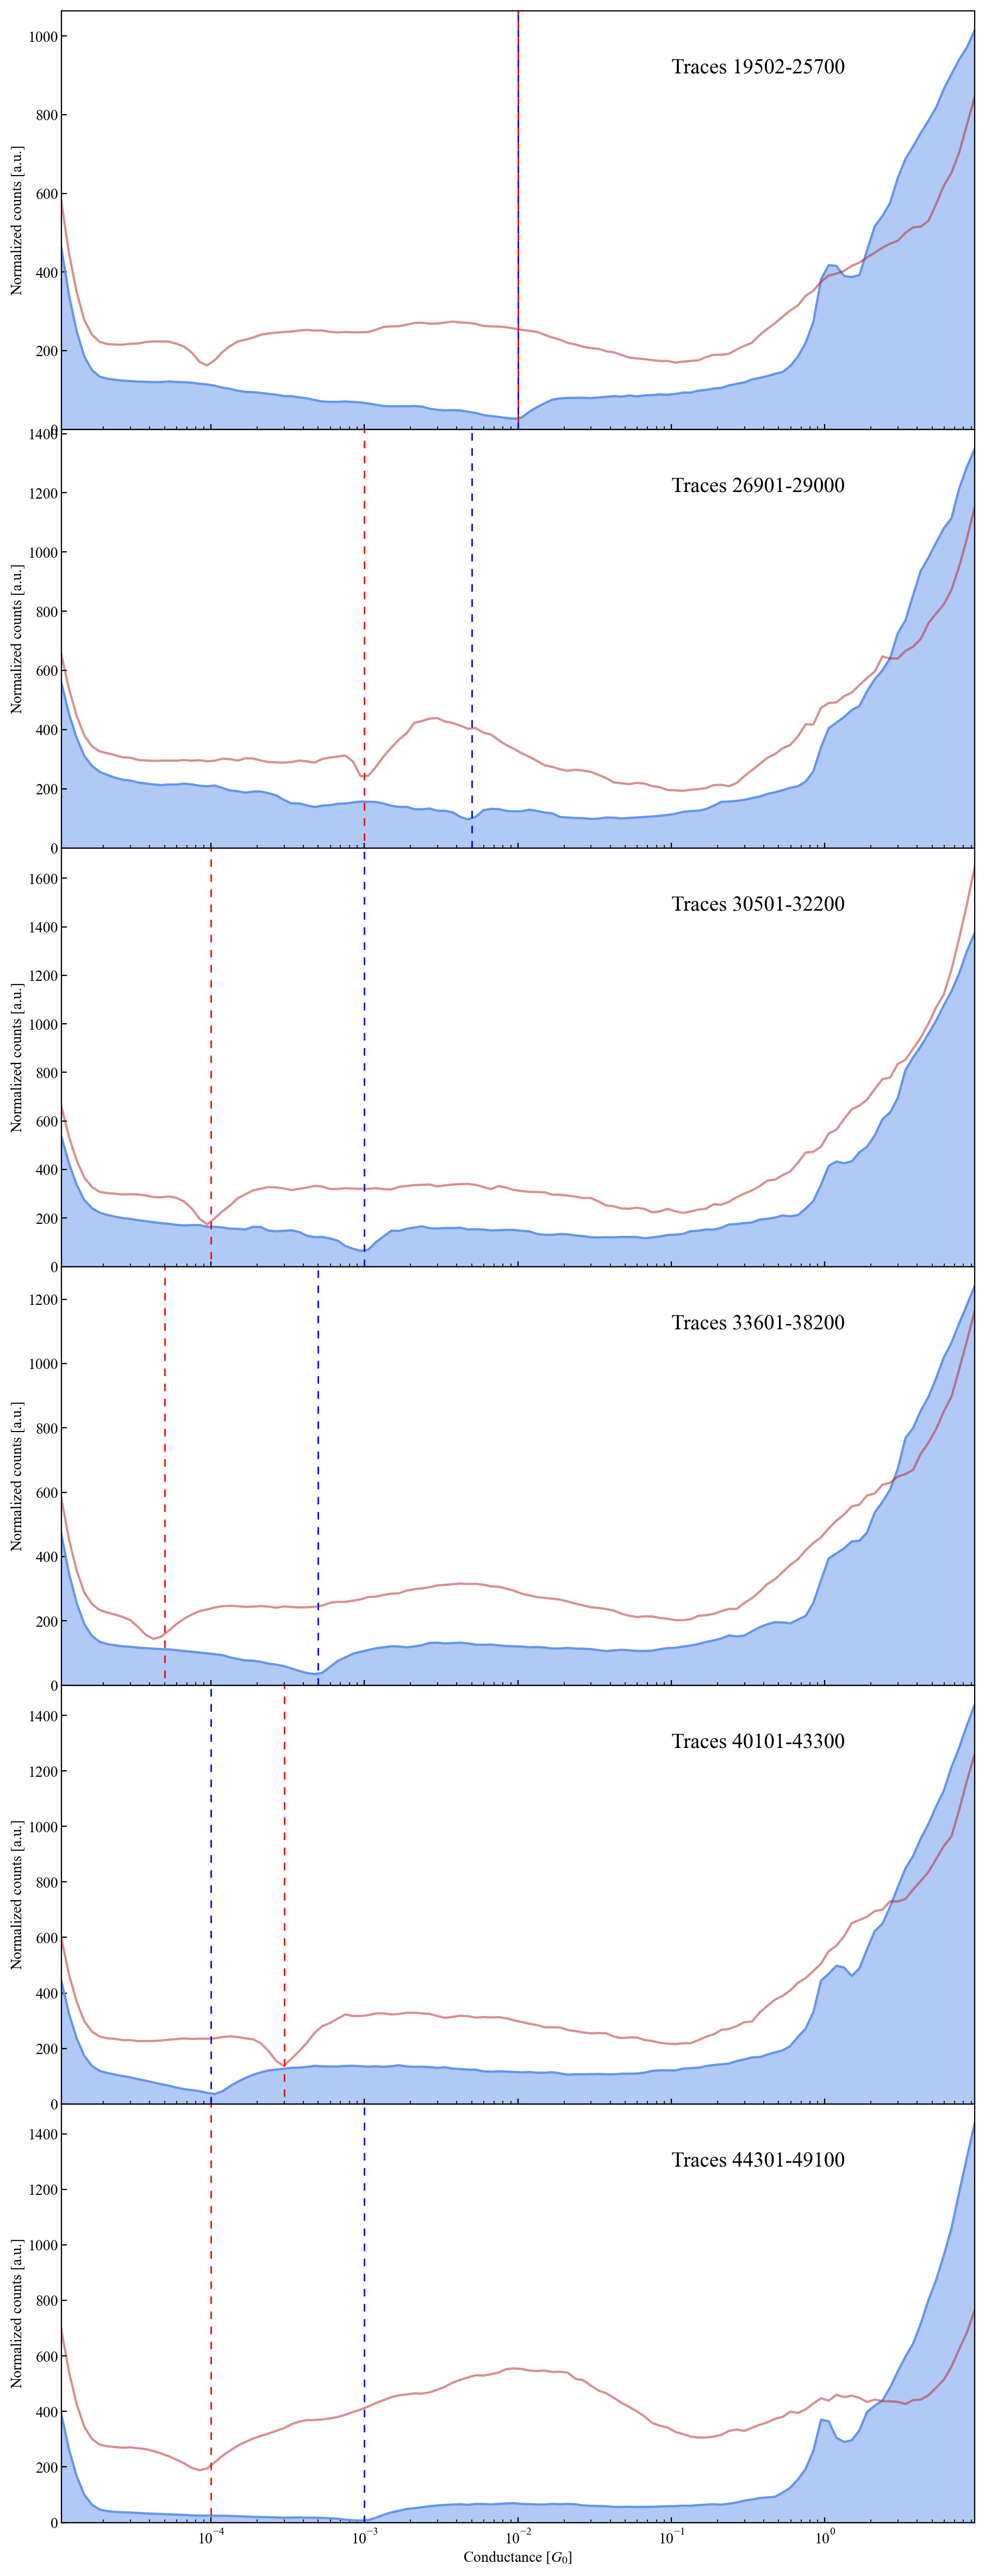

In [28]:
print(len(hold_on_hists))
figsize=(10, 5*len(hold_on_hists))
dpi=200
fig = plt.figure(figsize=figsize, dpi=dpi)
gs = plt.GridSpec(len(hold_on_hists), 1, figure=fig,
                  left=0.08, right=0.92, top=0.9, bottom=0.13,
                  hspace=0, wspace=0.2)

ax_hists = []
for i, hist in enumerate(hold_on_hists):
    ax_hists.append(fig.add_subplot(gs[i]))
    trace_pair = TracePair(hist.traces[-1], load_from=home_folder)
    hist.plot_hist_1d(ax=ax_hists[i], dpi=dpi)
    ax_hists[i].text(x=1e-1, y=0.85*ax_hists[i].get_ylim()[1], s=f'Traces {hold_on_traces[i][0]}-{hold_on_traces[i][-1]}')
    ax_hists[i].axvline(trace_pair.hold_set_pull, c='b', ls=(0, (5, 5)), lw=1)
    ax_hists[i].axvline(trace_pair.hold_set_push, c='r', ls=(5, (5, 5)), lw=1)
    
plt.show()

In [33]:
print(trace_pair.hold_set_pull)
print(trace_pair.hold_set_push)
print(trace_pair.hold_index_pull)
print(trace_pair.hold_index_push)
print(trace_pair.hold_conductance_pull)
print(trace_pair.hold_conductance_push)

print(trace_pair.conductance_pull[trace_pair.hold_index_pull])

0.001
0.0001
64776
38715
0.0008977674
9.659567e-05
0.0008977674


In [37]:
pull_set_trigger = []
pull_last_before_hold = []
pull_first_after_hold = []
pull_start_avg = []
pull_end_avg = []

push_set_trigger = []
push_last_before_hold = []
push_first_after_hold = []
push_start_avg = []
push_end_avg = []

for traces in hold_on_traces:
    for trace in tqdm(traces):
        try:
            trace_pair = TracePair(trace, load_from=home_folder)
            hold_trace = HoldTrace(trace, load_from=home_folder, r_serial_ohm=trace_pair.R_serial, sample_rate=trace_pair.sample_rate, min_step_len=20_000, min_height=1, iv=0)

            pull_set_trigger.append(trace_pair.hold_set_pull)
            pull_last_before_hold.append(trace_pair.conductance_pull[trace_pair.hold_index_pull])
            pull_first_after_hold.append(trace_pair.conductance_pull[trace_pair.hold_index_pull+1])
            pull_start_avg.append(hold_trace.G_hold_pull)
            pull_end_avg.append(hold_trace.G_avg_pull)

            push_set_trigger.append(trace_pair.hold_set_push)
            push_last_before_hold.append(trace_pair.conductance_push[trace_pair.hold_index_push])
            push_first_after_hold.append(trace_pair.conductance_push[trace_pair.hold_index_push+1])
            push_start_avg.append(hold_trace.G_hold_push)
            push_end_avg.append(hold_trace.G_avg_push)
        except MeasurementNotComplete:
            pull_set_trigger.append(np.nan)
            pull_last_before_hold.append(np.nan)
            pull_first_after_hold.append(np.nan)
            pull_start_avg.append(np.nan)
            pull_end_avg.append(np.nan)

            push_set_trigger.append(np.nan)
            push_last_before_hold.append(np.nan)
            push_first_after_hold.append(np.nan)
            push_start_avg.append(np.nan)
            push_end_avg.append(np.nan)

  0%|          | 0/6199 [00:00<?, ?it/s]

  0%|          | 0/2100 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:2432: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)


  0%|          | 0/1700 [00:00<?, ?it/s]

  0%|          | 0/4600 [00:00<?, ?it/s]

  0%|          | 0/3200 [00:00<?, ?it/s]

  0%|          | 0/4800 [00:00<?, ?it/s]

In [40]:
hold_df = pd.DataFrame(data={'pull_set_trigger': pull_set_trigger,
                             'pull_last_before_hold': pull_last_before_hold,
                             'pull_first_after_hold': pull_first_after_hold,
                             'pull_start_avg': pull_start_avg,
                             'pull_end_avg': pull_end_avg,
                             'push_set_trigger': push_set_trigger,
                             'push_last_before_hold': push_last_before_hold,
                             'push_first_after_hold': push_first_after_hold,
                             'push_start_avg': push_start_avg,
                             'push_end_avg': push_end_avg}, index=np.concatenate(hold_on_traces))

In [43]:
trace_pair = TracePair(np.concatenate(hold_on_traces)[0], load_from=home_folder)

pull_did_not_break, push_did_not_break = filter_traces.filter_hold(folder=home_folder,
                                                                   filter_condition=filter_traces.does_not_break_array,
                                                                   traces=np.concatenate(hold_on_traces),
                                                                   min_step_len=20_000, r_serial_ohm=trace_pair.R_serial, iv=0)

  0%|          | 0/22599 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:2432: MeasurementOverflow: Current overflow during I(V) cycle, in push direction.
  warnings.warn('Current overflow during I(V) cycle, in push direction.', MeasurementOverflow)


In [44]:
hold_df['pull_did_not_break'] = hold_df.index.isin(pull_did_not_break)
hold_df['push_did_not_break'] = hold_df.index.isin(push_did_not_break)

In [70]:
pull_did_not_break.shape

(12793,)

In [45]:
hold_df

pull_set_trigger  pull_last_before_hold  pull_first_after_hold  \
19502             0.010               0.000546           6.804601e-07   
19503             0.010               0.004629           4.836146e-07   
19504             0.010               0.007558           1.234091e-06   
19505             0.010               0.018298           8.527003e-07   
19506             0.010               0.003288           8.891679e-06   
...                 ...                    ...                    ...   
49096             0.001               0.001795           2.651402e-05   
49097             0.001               0.000863           3.685339e-05   
49098             0.001               0.000930           2.346057e-06   
49099             0.001               0.000697           3.342622e-06   
49100             0.001               0.000898           1.807348e-07   

       pull_start_avg  pull_end_avg  push_set_trigger  push_last_before_hold  \
19502        0.000195      0.000004            0.0100               0.000119   
19503        0.008449      0.000002            0.0100               0.000093   
19504        0.000991      0.000002            0.0100               0.000096   
19505        0.000019      0.000004            0.0100               0.000097   
19506        0.000023      0.000004            0.0100               0.000114   
...               ...           ...               ...                    ...   
49096        0.004498      0.000031            0.0001               0.000080   
49097        0.000929      0.000066            0.0001               0.000103   
49098        0.001218      0.000002            0.0001               0.000078   
49099        0.001413      0.000003            0.0001               0.000102   
49100        0.000839      0.000002            0.0001               0.000097   

       push_first_after_hold  push_start_avg  push_end_avg  \
19502               0.000017        0.000081      0.000014   
19503               0.000015        0.000018      0.000011   
19504               0.000216        0.000083      0.000263   
19505               0.000128        0.000068      0.000122   
19506               0.000086        0.000093      0.000118   
...                      ...             ...           ...   
49096               0.000160        0.000015      0.000133   
49097               0.000126        0.000061      0.000133   
49098               0.000105        0.000036      0.000112   
49099               0.000007        0.000049      0.000010   
49100               0.000109        0.000040      0.000112   

       pull_did_not_break  push_did_not_break  
19502               False               False  
19503               False               False  
19504               False                True  
19505               False                True  
19506               False                True  
...                   ...                 ...  
49096                True               False  
49097                True                True  
49098               False                True  
49099               False               False  
49100               False                True  

[22599 rows x 12 columns]

In [57]:
hold_df['pull_set_trigger'].unique()

array([0.01  ,    nan, 0.005 , 0.001 , 0.0005, 0.0001])

In [46]:
import seaborn as sns

In [49]:
hold_df.columns

Index(['pull_set_trigger', 'pull_last_before_hold', 'pull_first_after_hold',
       'pull_start_avg', 'pull_end_avg', 'push_set_trigger',
       'push_last_before_hold', 'push_first_after_hold', 'push_start_avg',
       'push_end_avg', 'pull_did_not_break', 'push_did_not_break'],
      dtype='object')

In [50]:
hold_df_log = hold_df.copy()

cols = ['pull_set_trigger', 'pull_last_before_hold', 'pull_first_after_hold', 'pull_start_avg', 'pull_end_avg',
        'push_set_trigger', 'push_last_before_hold', 'push_first_after_hold', 'push_start_avg', 'push_end_avg']

hold_df_log[cols] = hold_df_log[cols].transform(lambda x: np.log10(x))

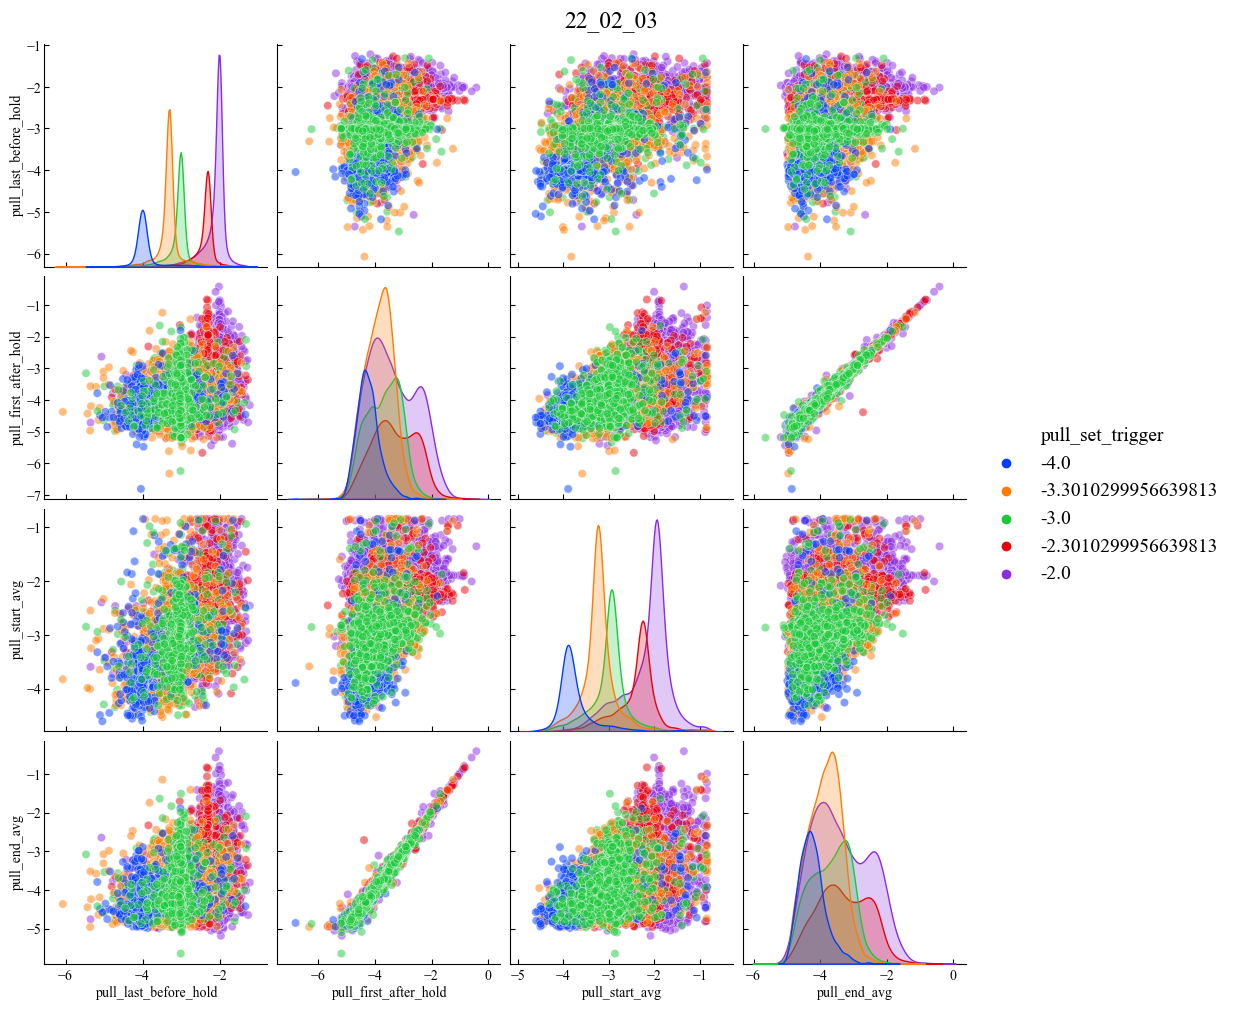

In [69]:
g = sns.pairplot(data=hold_df_log[hold_df_log['pull_did_not_break']], vars=['pull_last_before_hold', 'pull_first_after_hold', 'pull_start_avg', 'pull_end_avg'],
                 hue='pull_set_trigger', kind='scatter', plot_kws={'alpha': 0.5}, palette='bright')
g.fig.suptitle(f'{date}', y=1.01)
plt.savefig(home_folder.joinpath('results/pull_stats_scatter.png'), bbox_inches='tight')

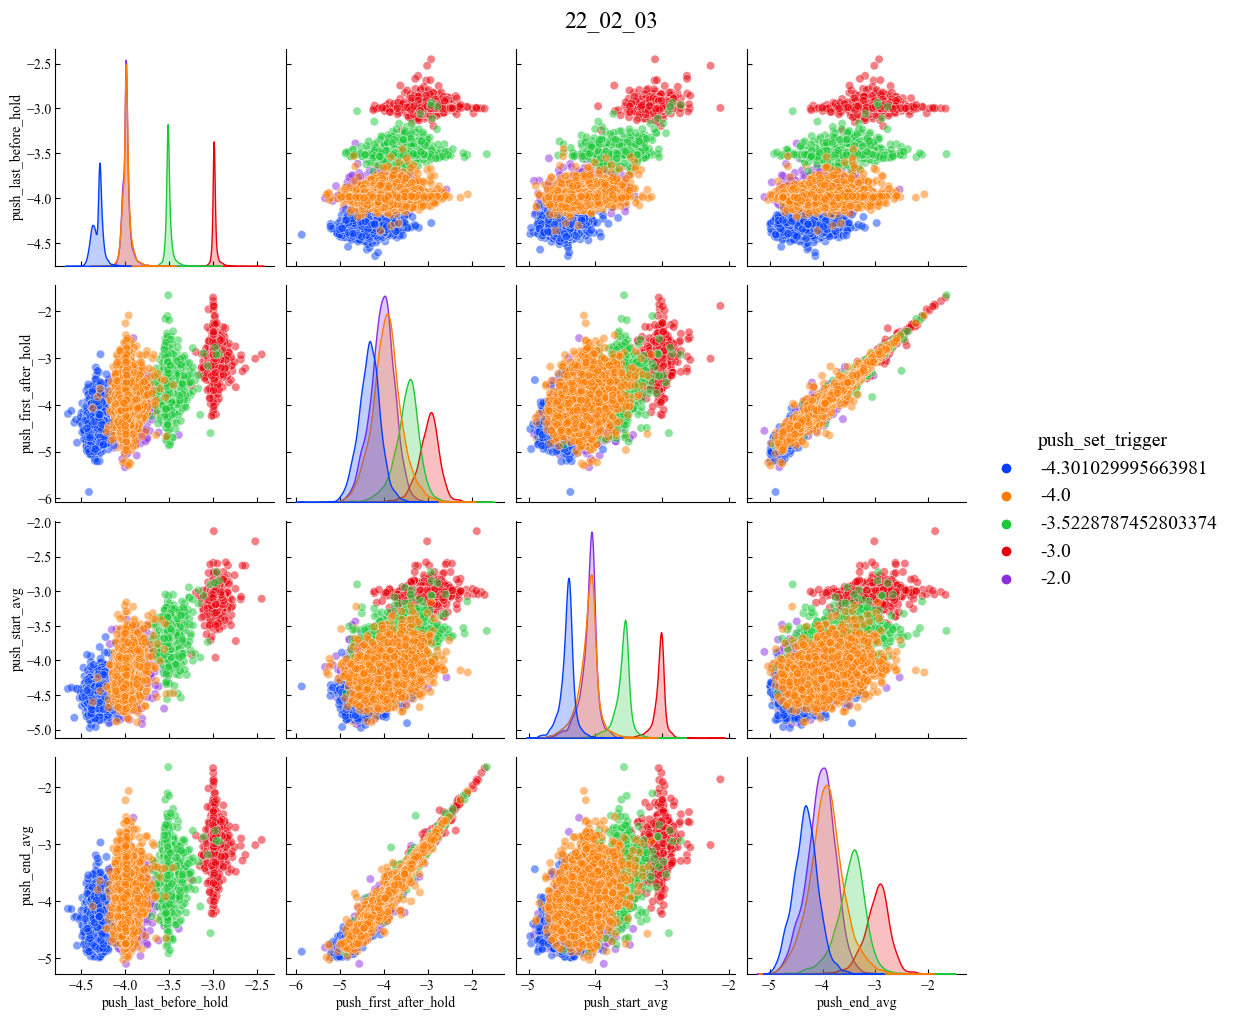

In [68]:
g = sns.pairplot(data=hold_df_log[hold_df_log['push_did_not_break']], vars=['push_last_before_hold', 'push_first_after_hold', 'push_start_avg', 'push_end_avg'],
                 hue='push_set_trigger', kind='scatter', plot_kws={'alpha': 0.5}, palette='bright')
g.fig.suptitle(f'{date}', y=1.02)
plt.savefig(home_folder.joinpath('results/push_stats_scatter.png'), bbox_inches='tight')

In [6]:
tunnel_pull_fits = pd.read_excel(io=home_folder.joinpath('results/IVs/selected/Tunnel_22_02_03_pull_fits_all.xlsx'))
tunnel_pull_fits['IV part'] = list(map(lambda x: int(re.search(r'(\d)_IV', x).group(1)), tunnel_pull_fits['Fit Trace']))

In [7]:
tunnel_pull_fits['R_meas1 [Ohm]'] = utils.convert_g0_to_ohm(tunnel_pull_fits['G_meas1 [G0]'])
tunnel_pull_fits['R_meas2 [Ohm]'] = utils.convert_g0_to_ohm(tunnel_pull_fits['G_meas2 [G0]'])
tunnel_pull_fits['R_meas_mean [Ohm]'] = tunnel_pull_fits[['R_meas1 [Ohm]', 'R_meas2 [Ohm]']].mean(axis=1)
tunnel_pull_fits['G_meas_mean [G0]'] = tunnel_pull_fits[['G_meas1 [G0]', 'G_meas2 [G0]']].mean(axis=1)

In [8]:
np.unique(abs(tunnel_pull_fits['R_meas_mean [Ohm]'] - tunnel_pull_fits['R [Ohm]'])/tunnel_pull_fits['R [Ohm]'] < 0.2, return_counts=True)

(array([False,  True]), array([4215, 5841], dtype=int64))

In [9]:
tunnel_pull_fits.sort_values(['Trace', 'IV part'])

Trace                   Fit Trace     R [Ohm]  z -Gap [nm]  \
0      19522  '1_IV_trace_19522_pull_pl'  13069957.0         0.32   
639    19522  '2_IV_trace_19522_pull_pl'  12976073.0         0.33   
1278   19522  '3_IV_trace_19522_pull_pl'  17213803.0         0.27   
1917   19522  '4_IV_trace_19522_pull_pl'  20498335.0         0.36   
1      19811  '1_IV_trace_19811_pull_pl'   3730296.1         0.21   
...      ...                         ...         ...          ...   
10054  48909  '4_IV_trace_48909_pull_pl'  63364976.0         0.34   
4430   49042  '1_IV_trace_49042_pull_pl'  16774953.0         0.33   
6305   49042  '2_IV_trace_49042_pull_pl'  15951589.0         0.32   
8180   49042  '3_IV_trace_49042_pull_pl'  18777990.0         0.32   
10055  49042  '4_IV_trace_49042_pull_pl'  19203370.0         0.32   

       Phi - Barrier [eV]         dR/dz       dR/dPhi  G_meas1 [G0]  \
0                    0.77  1.563003e+17  1.099730e+26      0.002974   
639                  0.68  1.483611e+17  1.122828e+26      0.002974   
1278                 1.76  2.784074e+17  8.233249e+25      0.002974   
1917                 0.76  2.371568e+17  1.994190e+26      0.002974   
1                    0.92  5.156197e+16  1.692375e+25      0.005064   
...                   ...           ...           ...           ...   
10054                1.96  1.033247e+18  3.765722e+26      0.000408   
4430                 0.87  2.068231e+17  1.323794e+26      0.001002   
6305                 0.93  2.029315e+17  1.186968e+26      0.001002   
8180                 1.07  2.507298e+17  1.328797e+26      0.001002   
10055                1.09  2.580173e+17  1.349476e+26      0.001002   

       dG/G_meas1  G_meas2 [G0]  dG/G_meas2  IV part  R_meas1 [Ohm]  \
0        0.085796      0.001155    0.143681        1      4337060.0   
639      0.085796      0.001155    0.143681        2      4337060.0   
1278     0.085796      0.001155    0.143681        3      4337060.0   
1917     0.085796      0.001155    0.143681        4      4337060.0   
1        0.107289      0.002731    0.043851        1      2547254.5   
...           ...           ...         ...      ...            ...   
10054    0.037719      0.000161    0.050349        4     31586484.0   
4430     0.032493      0.000760    0.021734        1     12877291.0   
6305     0.032493      0.000760    0.021734        2     12877291.0   
8180     0.032493      0.000760    0.021734        3     12877291.0   
10055    0.032493      0.000760    0.021734        4     12877291.0   

       R_meas2 [Ohm]  R_meas_mean [Ohm]  G_meas_mean [G0]  
0         11165012.0          7751036.0          0.002065  
639       11165012.0          7751036.0          0.002065  
1278      11165012.0          7751036.0          0.002065  
1917      11165012.0          7751036.0          0.002065  
1          4722916.5          3635085.5          0.003898  
...              ...                ...               ...  
10054     80331764.0         55959124.0          0.000284  
4430      16968166.0         14922728.5          0.000881  
6305      16968166.0         14922728.5          0.000881  
8180      16968166.0         14922728.5          0.000881  
10055     16968166.0         14922728.5          0.000881  

[10056 rows x 16 columns]

In [10]:
# (tunnel_pull_fits.sort_values(['Trace', 'IV part'])[tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Phi - Barrier [eV]'] < 2].groupby('Trace').count()['Fit Trace'] == 4).index

In [11]:
# tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Trace'][0] in np.array((tunnel_pull_fits.sort_values(['Trace', 'IV part'])[tunnel_pull_fits.sort_values(['Trace', 'IV part'])['Phi - Barrier [eV]'] < 2].groupby('Trace').count()['Fit Trace'] == 4).index)

In [12]:
res_df = tunnel_pull_fits.pivot(index='Trace', columns='IV part', values='R [Ohm]')
gap_df = tunnel_pull_fits.pivot(index='Trace', columns='IV part', values='z -Gap [nm]')
barrier_df = tunnel_pull_fits.pivot(index='Trace', columns='IV part', values='Phi - Barrier [eV]')

barrier_df_filt = barrier_df[(barrier_df < 2).all(axis=1)] # filter those I(V)s where the barrier is less than 2 for each quarter I(V) curve

In [13]:
# barrier_df_filt

In [40]:
res_df

IV part            1            2            3            4
Trace                                                      
19522     13069957.0   12976073.0   17213803.0   20498335.0
19811      3730296.1    3515856.2    4510825.8    4390826.3
19877      2902911.0    3245615.2    2966282.0    3828461.0
19905      1973310.2    1712091.0    1702341.2    1708102.0
19998      4073626.3    4506145.3    3952492.5    3869165.3
...              ...          ...          ...          ...
48577     18901426.0   20228459.0   16104054.0   18136585.0
48668    357581720.0  416858700.0  395382680.0  474985760.0
48837      8994304.4    9542325.4   13106108.0   13864712.0
48909     40294248.0   40398281.0   60607607.0   63364976.0
49042     16774953.0   15951589.0   18777990.0   19203370.0

[2514 rows x 4 columns]

In [55]:
tunnel_pull_fits.columns

Index(['Trace', 'Fit Trace', 'R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]',
       'dR/dz', 'dR/dPhi', 'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]',
       'dG/G_meas2', 'IV part', 'R_meas1 [Ohm]', 'R_meas2 [Ohm]',
       'R_meas_mean [Ohm]', 'G_meas_mean [G0]', 'Condition'],
      dtype='object')

In [64]:
tunnel_pull_data_Zoli = tunnel_pull_fits.pivot(index='Trace', columns='IV part', values=['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]'])
tunnel_pull_data_Zoli

R [Ohm]                                        z -Gap [nm]        \
IV part            1            2            3            4           1     2   
Trace                                                                           
19522     13069957.0   12976073.0   17213803.0   20498335.0        0.32  0.33   
19811      3730296.1    3515856.2    4510825.8    4390826.3        0.21  0.21   
19877      2902911.0    3245615.2    2966282.0    3828461.0        0.18  0.21   
19905      1973310.2    1712091.0    1702341.2    1708102.0        0.18  0.16   
19998      4073626.3    4506145.3    3952492.5    3869165.3        0.20  0.23   
...              ...          ...          ...          ...         ...   ...   
48577     18901426.0   20228459.0   16104054.0   18136585.0        0.26  0.26   
48668    357581720.0  416858700.0  395382680.0  474985760.0        0.44  0.48   
48837      8994304.4    9542325.4   13106108.0   13864712.0        0.29  0.30   
48909     40294248.0   40398281.0   60607607.0   63364976.0        0.38  0.34   
49042     16774953.0   15951589.0   18777990.0   19203370.0        0.33  0.32   

                    Phi - Barrier [eV]                    
IV part     3     4                  1     2     3     4  
Trace                                                     
19522    0.27  0.36               0.77  0.68  1.76  0.76  
19811    0.22  0.20               0.92  0.84  0.99  1.38  
19877    0.16  0.23               1.20  0.74  1.92  0.64  
19905    0.13  0.13               0.59  0.78  1.85  1.86  
19998    0.22  0.21               1.26  0.82  0.82  0.97  
...       ...   ...                ...   ...   ...   ...  
48577    0.25  0.26               2.12  2.22  2.14  2.06  
48668    0.49  0.58               2.07  1.73  1.60  1.08  
48837    0.24  0.24               0.76  0.71  2.09  2.18  
48909    0.33  0.34               1.06  1.51  2.09  1.96  
49042    0.32  0.32               0.87  0.93  1.07  1.09  

[2514 rows x 12 columns]

In [75]:
tunnel_pull_data = pd.DataFrame({i: tunnel_pull_data_Zoli[i].mean(axis=1) for i in ['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']})
tunnel_pull_data['G_meas1 [G0]'] = tunnel_pull_fits.groupby('Trace').mean()['G_meas1 [G0]']
tunnel_pull_data['G_meas2 [G0]'] = tunnel_pull_fits.groupby('Trace').mean()['G_meas2 [G0]']
tunnel_pull_data['G_meas_mean [G0]'] = tunnel_pull_fits.groupby('Trace').mean()['G_meas_mean [G0]']
tunnel_pull_data['R_meas1 [Ohm]'] = tunnel_pull_fits.groupby('Trace').mean()['R_meas1 [Ohm]']
tunnel_pull_data['R_meas2 [Ohm]'] = tunnel_pull_fits.groupby('Trace').mean()['R_meas2 [Ohm]']
tunnel_pull_data['R_meas_mean [Ohm]'] = tunnel_pull_fits.groupby('Trace').mean()['R_meas_mean [Ohm]']
tunnel_pull_data

R [Ohm]  z -Gap [nm]  Phi - Barrier [eV]  G_meas1 [G0]  \
Trace                                                                
19522  1.593954e+07       0.3200              0.9925      0.002974   
19811  4.036951e+06       0.2100              1.0325      0.005064   
19877  3.235817e+06       0.1950              1.1250      0.006574   
19905  1.773961e+06       0.1500              1.2700      0.011038   
19998  4.100357e+06       0.2150              0.9675      0.005919   
...             ...          ...                 ...           ...   
48577  1.834263e+07       0.2575              2.1350      0.000793   
48668  4.112022e+08       0.4975              1.6200      0.000072   
48837  1.137686e+07       0.2675              1.4350      0.002246   
48909  5.116628e+07       0.3475              1.6550      0.000408   
49042  1.767698e+07       0.3225              0.9900      0.001002   

       G_meas2 [G0]  G_meas_mean [G0]  R_meas1 [Ohm]  R_meas2 [Ohm]  \
Trace                                                                 
19522      0.001155          0.002065   4.337060e+06   1.116501e+07   
19811      0.002731          0.003898   2.547255e+06   4.722917e+06   
19877      0.004031          0.005303   1.962315e+06   3.200030e+06   
19905      0.007856          0.009447   1.168684e+06   1.642018e+06   
19998      0.002665          0.004292   2.179493e+06   4.840504e+06   
...             ...               ...            ...            ...   
48577      0.000575          0.000684   1.626434e+07   2.245231e+07   
48668      0.000056          0.000064   1.796838e+08   2.318009e+08   
48837      0.001449          0.001848   5.743855e+06   8.901676e+06   
48909      0.000161          0.000284   3.158648e+07   8.033176e+07   
49042      0.000760          0.000881   1.287729e+07   1.696817e+07   

       R_meas_mean [Ohm]  
Trace                     
19522       7.751036e+06  
19811       3.635086e+06  
19877       2.581172e+06  
19905       1.405351e+06  
19998       3.509998e+06  
...                  ...  
48577       1.935832e+07  
48668       2.057423e+08  
48837       7.322766e+06  
48909       5.595912e+07  
49042       1.492273e+07  

[2514 rows x 9 columns]

In [14]:
tunnel_pull_fits['Condition'] = tunnel_pull_fits['Trace'].isin(barrier_df_filt.index)

In [15]:
tunnel_pull_fits[tunnel_pull_fits['Condition']].sort_values(['Trace', 'IV part'])

Trace                   Fit Trace     R [Ohm]  z -Gap [nm]  \
0      19522  '1_IV_trace_19522_pull_pl'  13069957.0         0.32   
639    19522  '2_IV_trace_19522_pull_pl'  12976073.0         0.33   
1278   19522  '3_IV_trace_19522_pull_pl'  17213803.0         0.27   
1917   19522  '4_IV_trace_19522_pull_pl'  20498335.0         0.36   
1      19811  '1_IV_trace_19811_pull_pl'   3730296.1         0.21   
...      ...                         ...         ...          ...   
10050  48454  '4_IV_trace_48454_pull_pl'  89495813.0         0.46   
4430   49042  '1_IV_trace_49042_pull_pl'  16774953.0         0.33   
6305   49042  '2_IV_trace_49042_pull_pl'  15951589.0         0.32   
8180   49042  '3_IV_trace_49042_pull_pl'  18777990.0         0.32   
10055  49042  '4_IV_trace_49042_pull_pl'  19203370.0         0.32   

       Phi - Barrier [eV]         dR/dz       dR/dPhi  G_meas1 [G0]  \
0                    0.77  1.563003e+17  1.099730e+26      0.002974   
639                  0.68  1.483611e+17  1.122828e+26      0.002974   
1278                 1.76  2.784074e+17  8.233249e+25      0.002974   
1917                 0.76  2.371568e+17  1.994190e+26      0.002974   
1                    0.92  5.156197e+16  1.692375e+25      0.005064   
...                   ...           ...           ...           ...   
10050                0.95  1.058251e+18  1.016501e+27      0.000358   
4430                 0.87  2.068231e+17  1.323794e+26      0.001002   
6305                 0.93  2.029315e+17  1.186968e+26      0.001002   
8180                 1.07  2.507298e+17  1.328797e+26      0.001002   
10055                1.09  2.580173e+17  1.349476e+26      0.001002   

       dG/G_meas1  G_meas2 [G0]  dG/G_meas2  IV part  R_meas1 [Ohm]  \
0        0.085796      0.001155    0.143681        1      4337060.0   
639      0.085796      0.001155    0.143681        2      4337060.0   
1278     0.085796      0.001155    0.143681        3      4337060.0   
1917     0.085796      0.001155    0.143681        4      4337060.0   
1        0.107289      0.002731    0.043851        1      2547254.5   
...           ...           ...         ...      ...            ...   
10050    0.075724      0.000124    0.081056        4     36065152.0   
4430     0.032493      0.000760    0.021734        1     12877291.0   
6305     0.032493      0.000760    0.021734        2     12877291.0   
8180     0.032493      0.000760    0.021734        3     12877291.0   
10055    0.032493      0.000760    0.021734        4     12877291.0   

       R_meas2 [Ohm]  R_meas_mean [Ohm]  G_meas_mean [G0]  Condition  
0       1.116501e+07          7751036.0          0.002065       True  
639     1.116501e+07          7751036.0          0.002065       True  
1278    1.116501e+07          7751036.0          0.002065       True  
1917    1.116501e+07          7751036.0          0.002065       True  
1       4.722917e+06          3635085.5          0.003898       True  
...              ...                ...               ...        ...  
10050   1.036464e+08         69855778.0          0.000241       True  
4430    1.696817e+07         14922728.5          0.000881       True  
6305    1.696817e+07         14922728.5          0.000881       True  
8180    1.696817e+07         14922728.5          0.000881       True  
10055   1.696817e+07         14922728.5          0.000881       True  

[6596 rows x 17 columns]

In [16]:
tunnel_pull_fits.columns

Index(['Trace', 'Fit Trace', 'R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]',
       'dR/dz', 'dR/dPhi', 'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]',
       'dG/G_meas2', 'IV part', 'R_meas1 [Ohm]', 'R_meas2 [Ohm]',
       'R_meas_mean [Ohm]', 'G_meas_mean [G0]', 'Condition'],
      dtype='object')

In [17]:
which_trace=19522

print(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].mean())
tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']]
which_trace = tunnel_pull_fits['Trace'].unique()[1]

print("\nHow each value differs from the mean:")
tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].apply(lambda x: abs(np.mean(x)-x)/np.mean(x))

R [Ohm]               1.593954e+07
z -Gap [nm]           3.200000e-01
Phi - Barrier [eV]    9.925000e-01
dtype: float64

How each value differs from the mean:


R [Ohm]   z -Gap [nm]  Phi - Barrier [eV]
1     0.075962  1.321694e-16            0.108959
640   0.129081  1.321694e-16            0.186441
1279  0.117384  4.761905e-02            0.041162
1918  0.087659  4.761905e-02            0.336562

In [18]:
# tunnel_pull_fits = tunnel_pull_fits[tunnel_pull_fits['Condition']]  # only keep those where barrier is less than 2

In [19]:
mean_differences_df = tunnel_pull_fits.sort_values(['Trace', 'IV part']).groupby(['Trace'])[['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].apply(lambda x: abs(np.mean(x)-x)/np.mean(x))

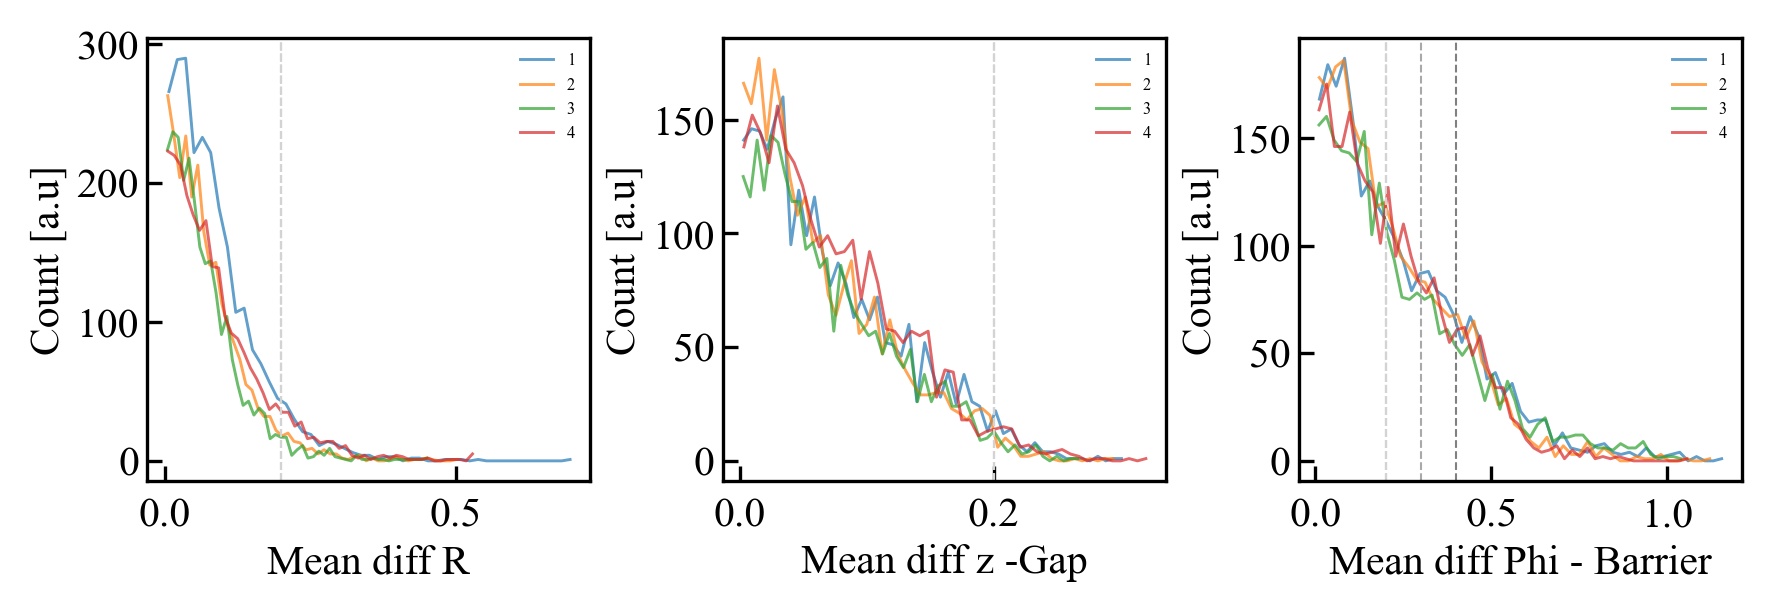

In [20]:
dpi=300
fig = plt.figure(figsize=utils.cm2inch(18, 6), dpi=dpi)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=1, ncols=3,
                       figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.3, hspace=0)

hue = 'IV part'
bins_dict = {}
hist_1d_dict = {}
axs=[]

data = mean_differences_df.join(tunnel_pull_fits.sort_values(['Trace', 'IV part'])['IV part'], how='left')

for ind, val in enumerate(mean_differences_df.columns):
    axs.append(fig.add_subplot(gs[ind]))
    for i in range(1, 5):
        bins, hist_1d = utils.calc_hist_1d_single(data=data[data[hue] == i][val],
                                                  xrange=(min(data[data[hue] == i][val]), max(data[data[hue] == i][val])),
                                                  xbins_num = 50, log_scale = False, bin_mode='decade')
        
        bins_dict[val] = bins
        hist_1d_dict[val] = hist_1d
        
        axs[ind].set_box_aspect(1)
        axs[ind].plot(bins_dict[val], hist_1d_dict[val], label=f'{i}', alpha=0.7, lw=0.7)
        axs[ind].legend(fontsize=4, frameon=False)
        axis_label = re.search(r'([^\[^\]]*)', val).group(1).strip()
        axs[ind].set_xlabel(f'Mean diff {axis_label}')
        axs[ind].set_ylabel('Count [a.u]')
        
        axs[ind].axvline(0.2, ls='--', c='lightgrey', lw=0.5)
axs[-1].axvline(0.3, ls='--', c='darkgrey', lw=0.5)
axs[-1].axvline(0.4, ls='--', c='grey', lw=0.5)

In [21]:
mean_diff_R = np.array([])
for which_trace in tunnel_pull_fits['Trace'].unique():
    temp_df = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace][['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]']].apply(lambda x: abs(np.mean(x)-x)/np.mean(x))
    mean_diff_R = np.append(mean_diff_R, temp_df['R [Ohm]'])

## Filter those where the values (Resistance, gap, barrier) in the 4 quarters do not differ more than 20% from each other AND the measured and simulated resistances also don't differ more than 20%

In [148]:
collected_traces = []

for which_trace in tunnel_pull_fits['Trace'].unique():
    # print(which_trace)
    R_mean = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'].mean()
    gap_mean = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'].mean()
    barrier_mean = tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'].mean()

#     print(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'] - R_mean)/R_mean)
#     print(np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'] - R_mean)/R_mean < 0.2))

#     print(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'] - gap_mean)/gap_mean)
#     print(np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'] - gap_mean)/gap_mean < 0.2))

#     print(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'] - barrier_mean)/barrier_mean)
#     print(np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'] - barrier_mean)/barrier_mean < 0.2))

    if np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'] - R_mean)/R_mean < 0.2) and \
       np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['z -Gap [nm]'] - gap_mean)/gap_mean < 0.2) and\
       np.all(abs(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['Phi - Barrier [eV]'] - barrier_mean)/barrier_mean < 0.2) and \
       np.all(abs(np.log10(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R_meas_mean [Ohm]']) - 
                  np.log10(tunnel_pull_fits[tunnel_pull_fits['Trace'] == which_trace]['R [Ohm]'])) < np.log10(2)):
        collected_traces.append(which_trace)

In [149]:
good_traces, count_traces = np.unique(collected_traces, return_counts=True)
# print(good_traces, count_traces)

In [150]:
print(len(collected_traces))
print(good_traces.shape[0])

572
572


In [151]:
tunnel_pull_fits_filt = tunnel_pull_fits[tunnel_pull_fits['Trace'].isin(good_traces)].sort_values(by=['Trace', 'IV part'])

print(tunnel_pull_fits_filt.shape)

(2288, 17)


In [154]:
tunnel_pull_fits_filt.groupby('Trace').mean()[tunnel_pull_fits_filt.groupby('Trace').mean()['Condition'].astype(bool)]

R [Ohm]  z -Gap [nm]  Phi - Barrier [eV]         dR/dz  \
Trace                                                                
20517  1.354964e+06       0.1475              0.6700  1.843468e+16   
20518  9.615626e+05       0.1225              0.6650  1.342126e+16   
20527  5.149306e+06       0.2375              0.8675  6.824072e+16   
20530  2.869659e+06       0.2025              0.7075  3.729461e+16   
20531  6.248108e+06       0.2575              0.7950  7.946101e+16   
...             ...          ...                 ...           ...   
47230  4.666233e+07       0.3700              1.2725  6.390111e+17   
47233  2.460734e+07       0.3725              0.7750  2.836915e+17   
47313  2.158891e+07       0.3450              0.9300  2.679044e+17   
48454  9.016946e+07       0.4850              0.8125  9.922490e+17   
49042  1.767698e+07       0.3225              0.9900  2.296254e+17   

            dR/dPhi  G_meas1 [G0]  dG/G_meas1  G_meas2 [G0]  dG/G_meas2  \
Trace                                                                     
20517  4.528422e+24      0.010731    0.031222      0.012714    0.019314   
20518  2.604358e+24      0.014985    0.018039      0.017040    0.014219   
20527  2.823753e+25      0.002435    0.027649      0.004244    0.019748   
20530  1.383622e+25      0.004312    0.018344      0.004752    0.019287   
20531  3.862504e+25      0.003212    0.036714      0.001928    0.029694   
...             ...           ...         ...           ...         ...   
47230  3.653199e+26      0.000790    0.026943      0.000215    0.040199   
47233  2.461089e+26      0.000696    0.030414      0.000416    0.046547   
47313  1.814508e+26      0.001113    0.039496      0.000570    0.036876   
48454  1.177250e+27      0.000358    0.075724      0.000124    0.081056   
49042  1.297259e+26      0.001002    0.032493      0.000760    0.021734   

       IV part  R_meas1 [Ohm]  R_meas2 [Ohm]  R_meas_mean [Ohm]  \
Trace                                                             
20517      2.5   1.202143e+06   1.014645e+06       1.108394e+06   
20518      2.5   8.608826e+05   7.570629e+05       8.089727e+05   
20527      2.5   5.297717e+06   3.039647e+06       4.168682e+06   
20530      2.5   2.991873e+06   2.714440e+06       2.853157e+06   
20531      2.5   4.015945e+06   6.690608e+06       5.353276e+06   
...        ...            ...            ...                ...   
47230      2.5   1.632615e+07   6.001126e+07       3.816871e+07   
47233      2.5   1.854021e+07   3.101034e+07       2.477528e+07   
47313      2.5   1.158530e+07   2.261888e+07       1.710209e+07   
48454      2.5   3.606515e+07   1.036464e+08       6.985578e+07   
49042      2.5   1.287729e+07   1.696817e+07       1.492273e+07   

       G_meas_mean [G0]  Condition  
Trace                               
20517          0.011722        1.0  
20518          0.016012        1.0  
20527          0.003339        1.0  
20530          0.004532        1.0  
20531          0.002570        1.0  
...                 ...        ...  
47230          0.000503        1.0  
47233          0.000556        1.0  
47313          0.000842        1.0  
48454          0.000241        1.0  
49042          0.000881        1.0  

[543 rows x 15 columns]

In [67]:
# tunnel_pull_fits_filt.columns

In [48]:
# tunnel_pull_fits_filt.to_excel(excel_writer=home_folder.joinpath('results/IVs/selected/Tunnel_22_02_03_pull_fits_filtered.xlsx'), columns=['Trace', 'Fit Trace', 'R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]', 'dR/dz', 'dR/dPhi', 'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]', 'dG/G_meas2', 'R_meas1 [Ohm]', 'R_meas2 [Ohm]',
#        'R_meas_mean [Ohm]'])

In [502]:
# which_trace = tunnel_pull_fits_filt['Trace'].unique()[0]

# print(tunnel_pull_fits_filt[tunnel_pull_fits_filt['Trace'] == which_trace]['R [Ohm]'].mean())
# print(tunnel_pull_fits_filt[tunnel_pull_fits_filt['Trace'] == which_trace]['z -Gap [nm]'].mean())
# print(tunnel_pull_fits_filt[tunnel_pull_fits_filt['Trace'] == which_trace]['Phi - Barrier [eV]'].mean())

In [503]:
# tunnel_pull_fits_filt.iloc[np.arange(0, tunnel_pull_fits_filt.shape[0], 4, dtype=int)]

In [147]:
tunnel_pull_fits_filt.groupby('Trace').mean()

R [Ohm]  z -Gap [nm]  Phi - Barrier [eV]         dR/dz  \
Trace                                                                
20092  8.235155e+06       0.2750              0.8625  1.060665e+17   
20517  1.354964e+06       0.1475              0.6700  1.843468e+16   
20518  9.615626e+05       0.1225              0.6650  1.342126e+16   
20527  5.149306e+06       0.2375              0.8675  6.824072e+16   
20529  1.098552e+06       0.1300              0.7400  1.549922e+16   
...             ...          ...                 ...           ...   
48223  8.185159e+07       0.4725              0.8400  9.099283e+17   
48283  2.283514e+08       0.4975              1.2350  2.914742e+18   
48454  9.016946e+07       0.4850              0.8125  9.922490e+17   
48577  1.834263e+07       0.2575              2.1350  3.202313e+17   
49042  1.767698e+07       0.3225              0.9900  2.296254e+17   

            dR/dPhi  G_meas1 [G0]  dG/G_meas1  G_meas2 [G0]  dG/G_meas2  \
Trace                                                                     
20092  5.302320e+25      0.004061    0.127587      0.001534    0.069357   
20517  4.528422e+24      0.010731    0.031222      0.012714    0.019314   
20518  2.604358e+24      0.014985    0.018039      0.017040    0.014219   
20527  2.823753e+25      0.002435    0.027649      0.004244    0.019748   
20529  3.095655e+24      0.009402    0.040536      0.014225    0.012805   
...             ...           ...         ...           ...         ...   
48223  1.027878e+27      0.000501    0.077991      0.000159    0.066896   
48283  2.608462e+27      0.000060    0.057851      0.000070    0.056159   
48454  1.177250e+27      0.000358    0.075724      0.000124    0.081056   
48577  7.749402e+25      0.000793    0.053881      0.000575    0.033965   
49042  1.297259e+26      0.001002    0.032493      0.000760    0.021734   

       IV part  R_meas1 [Ohm]  R_meas2 [Ohm]  R_meas_mean [Ohm]  \
Trace                                                             
20092      2.5   3.176642e+06   8.410394e+06       5.793518e+06   
20517      2.5   1.202143e+06   1.014645e+06       1.108394e+06   
20518      2.5   8.608826e+05   7.570629e+05       8.089727e+05   
20527      2.5   5.297717e+06   3.039647e+06       4.168682e+06   
20529      2.5   1.372021e+06   9.068641e+05       1.139443e+06   
...        ...            ...            ...                ...   
48223      2.5   2.573963e+07   8.093946e+07       5.333955e+07   
48283      2.5   2.148988e+08   1.851495e+08       2.000242e+08   
48454      2.5   3.606515e+07   1.036464e+08       6.985578e+07   
48577      2.5   1.626434e+07   2.245231e+07       1.935832e+07   
49042      2.5   1.287729e+07   1.696817e+07       1.492273e+07   

       G_meas_mean [G0]  Condition  
Trace                               
20092          0.002797        1.0  
20517          0.011722        1.0  
20518          0.016012        1.0  
20527          0.003339        1.0  
20529          0.011814        1.0  
...                 ...        ...  
48223          0.000330        1.0  
48283          0.000065        1.0  
48454          0.000241        1.0  
48577          0.000684        0.0  
49042          0.000881        1.0  

[944 rows x 15 columns]

In [50]:
# tunnel_pull_fits_filt[tunnel_pull_fits_filt['dR/dPhi'] == 0]

In [68]:
# tunnel_pull_fits_filt.columns

In [140]:
def scatter_plot_matrix(data: pd.DataFrame, col_names: Tuple[str, ...], set_log: Tuple[bool, ...], set_limits: Tuple[Union[Tuple[float, float], None], ...] = None,
                        hue: Optional[str] = None, cmap = colormaps['Reds'], cmap_reversed=False, bins_num: Union[Tuple[int, ...], int] = 100,
                        figsize: Optional[Tuple[float, float]] = None, dpi: int = 300, min_plot_size=utils.cm2inch(8, 8), **scatter_kwargs):
        
    if hue is None:
        num_categories = 1
    else:
        num_categories = data[hue].nunique()
        categories = data[hue].unique()
        if cmap_reversed:
            my_cmap = cmap(np.linspace(0.25, 1, num_categories))[::-1]
        else:
            my_cmap = cmap(np.linspace(0.25, 1, num_categories))
        
    num_cols = len(col_names)
    
    if isinstance(bins_num, int):
        bins_num = (bins_num, )*num_cols
    
    # print(my_cmap)
    
    if len(set_log) != num_cols:
        raise ValueError('Not enough `set_log` parameters! Must be same length as `col_names`')
    
    if figsize is None:
        figsize = (1.1 * min_plot_size[0], min_plot_size[1])
    
    fig = plt.figure(figsize=figsize, dpi=dpi)  # figsize: (width, height) in inches
    gs = gridspec.GridSpec(nrows=num_cols, ncols=num_cols, width_ratios=num_cols*(1,), height_ratios=num_cols*(1,),
                           figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.4, hspace=0.4)
    
    axs = []
    if num_categories == 1:
        for i, row in enumerate(col_names):
            for j, col in enumerate(col_names):
                axs.append(fig.add_subplot(gs[i, j]))
                axs[i*num_cols + j].set_xlabel(col_names[j])
                if i != j:
                    axs[i*num_cols + j].set_ylabel(col_names[i])
                    axs[i*num_cols + j].scatter(data[col_names[j]], data[col_names[i]], **scatter_kwargs)
                    if set_log[i]:
                        axs[i*num_cols + j].set_yscale('log')
                else:
                    axs[i*num_cols + j].set_ylabel('Counts [a.u.]')
                    bins, hist_1d = utils.calc_hist_1d_single(data=data[col_names[j]], xrange=(min(data[col_names[j]]), max(data[col_names[j]])),
                                                              xbins_num=bins_num[i], log_scale=set_log[j], bin_mode='total')

                    axs[i*num_cols + j].plot(bins, hist_1d, lw=1)

                if set_log[j]:
                    axs[i*num_cols + j].set_xscale('log')
    else:
        
        for i, row in enumerate(col_names):
            for j, col in enumerate(col_names):
                axs.append(fig.add_subplot(gs[i, j]))
                for k, cat in enumerate(categories):
                    axs[i*num_cols + j].set_xlabel(col_names[j])
                    if i != j:
                        axs[i*num_cols + j].set_ylabel(col_names[i])
                        axs[i*num_cols + j].scatter(data[data[hue]==cat][col_names[j]], data[data[hue]==cat][col_names[i]], color=my_cmap[k], **scatter_kwargs)
                        if set_log[i]:
                            axs[i*num_cols + j].set_yscale('log')
                    else:
                        axs[i*num_cols + j].set_ylabel('Counts [a.u.]')
                        bins, hist_1d = utils.calc_hist_1d_single(data=data[data[hue]==cat][col_names[j]], xrange=(min(data[data[hue]==cat][col_names[j]]), max(data[data[hue]==cat][col_names[j]])),
                                                                  xbins_num=bins_num[i], log_scale=set_log[j], bin_mode='total')
                        
                        axs[i*num_cols + j].plot(bins, hist_1d, lw=1, c=my_cmap[k], alpha=0.8, label=categories[k])
                        axs[i*num_cols + j].legend(fontsize=rcParams['xtick.labelsize'], frameon=False, handlelength=rcParams['xtick.labelsize']/4)

                    if set_log[j]:
                        axs[i*num_cols + j].set_xscale('log')
                        
    return axs

# ********************************************************************************************

def hist_2d_plot_matrix(data: pd.DataFrame, col_names: Tuple[str, ...], set_log: Tuple[bool, ...], set_limits: Tuple[Union[Tuple[float, float], None], ...] = None,
                        cmap = utils.cmap_geo32, bins_num: Union[Tuple[int, ...], int] = 100,
                        figsize: Optional[Tuple[float, float]] = None, dpi: int = 300, min_plot_size=utils.cm2inch(8, 8), **scatter_kwargs):
        
    num_cols = len(col_names)
    
    if isinstance(bins_num, int):
        bins_num = (bins_num, )*num_cols
    
    # print(my_cmap)
    
    if len(set_log) != num_cols:
        raise ValueError('Not enough `set_log` parameters! Must be same length as `col_names`')
    
    if figsize is None:
        figsize = (1.1 * min_plot_size[0], min_plot_size[1])
    
    fig = plt.figure(figsize=figsize, dpi=dpi)  # figsize: (width, height) in inches
    gs = gridspec.GridSpec(nrows=num_cols, ncols=num_cols, width_ratios=num_cols*(1,), height_ratios=num_cols*(1,),
                           figure=fig, left=0.2, right=0.95, top=0.95, bottom=0.15, wspace=0.4, hspace=0.4)
    
    axs = []
    ims = []
    for i, row in enumerate(col_names):
        for j, col in enumerate(col_names):
            axs.append(fig.add_subplot(gs[i, j]))
            axs[i*num_cols + j].set_xlabel(col_names[j])
            if i != j:
                axs[i*num_cols + j].set_ylabel(col_names[i])
                
                x_mesh, y_mesh, hist_2d = utils.calc_hist_2d_single(x=data[col_names[j]], y=data[col_names[i]],
                                                      xrange=(min(data[col_names[j]]), max(data[col_names[j]])), log_scale_x=set_log[j],
                                                      yrange=(min(data[col_names[i]]), max(data[col_names[i]])), log_scale_y=set_log[i],
                                                      num_bins= (bins_num[j], bins_num[i]),
                                                      bin_mode_x='total',
                                                      bin_mode_y='total')
                
                ims.append(axs[i*num_cols + j].pcolormesh(x_mesh, y_mesh, hist_2d, cmap=cmap))
                # axs[i*num_cols + j].scatter(data[col_names[j]], data[col_names[i]], **scatter_kwargs)
                if set_log[i]:
                    axs[i*num_cols + j].set_yscale('log')
            else:
                axs[i*num_cols + j].set_ylabel('Counts [a.u.]')
                bins, hist_1d = utils.calc_hist_1d_single(data=data[col_names[j]], xrange=(min(data[col_names[j]]), max(data[col_names[j]])),
                                                          xbins_num=bins_num[i], log_scale=set_log[j], bin_mode='total')

                axs[i*num_cols + j].plot(bins, hist_1d, lw=1)

            if set_log[j]:
                axs[i*num_cols + j].set_xscale('log')
    return axs

In [80]:
def calc_2dhist_from_df(data, x_col, y_col, xrange = (1e-5, 1e-2), yrange = (1e-2, 1), num_bins = (20, 20), log_scale=(True, False)):
    
    if log_scale[0]:
        num_of_decs_x = np.log10(xrange[1]) - np.log10(xrange[0])
        total_bins_x = int(num_bins[0] * num_of_decs_x)
        xbins = np.logspace(np.log10(xrange[0]), np.log10(xrange[1]), num=total_bins_x)
    else:
        total_bins_x = num_bins[0]
        xbins = np.linspace(xrange[0], xrange[1], num=total_bins_x)
        
    if log_scale[1]:
        num_of_decs_y = np.log10(yrange[1]) - np.log10(yrange[0])
        total_bins_y = int(num_bins[1] * num_of_decs_y)
        ybins = np.logspace(np.log10(yrange[0]), np.log10(yrange[1]), num=total_bins_y)
    else:
        total_bins_y = num_bins[1]
        ybins = np.linspace(yrange[0], yrange[1], num=total_bins_y)
    
    # print(num_of_decs_x, num_of_decs_y)

    h, xedges, yedges = np.histogram2d(data[x_col], data[y_col], bins=[xbins, ybins])
    x_mesh, y_mesh = np.meshgrid(xedges, yedges)

    return x_mesh, y_mesh, h.T

def igor_gaussian_fun(x, y0, A, x0, width):
    
    """
    x0: mean
    width: FWHM, width/2: variance ( sqrt(variance) = standard deviation )
    A: amplitude
    y0: vertical offset
    """
    
    return y0 + A * np.exp( -1 * ((x - x0)/width)**2 )

def fitgauss2hist(yedges, hist2d, log_y=False):
    # popts = []
    # popts_norm = []
    # perrs = []
    
    popts = np.zeros((hist2d.shape[1], 4))
    perrs = np.zeros((hist2d.shape[1], 4))
    # popts_norm = np.zeros((hist2d.shape[1], 4))
    
    ymiddle = yedges[:-1] + np.diff(yedges)/2
    
    if log_y:
        ymiddle = np.log10(ymiddle)
    
    for i in range(hist2d.shape[1]):
        max_val = max(hist2d[:, i])
        max_val_at = ymiddle[hist2d[:, i] == max_val][0]
        
        try:
            if sum(hist2d[:, i]) < max(hist2d.sum(axis=0))/10:
                raise ValueError('Count too low to fit.')
            
            popt, pcov = scipy.optimize.curve_fit(igor_gaussian_fun, ymiddle, hist2d[:, i],
                                                  p0=(1e-10, 1, max_val_at, 1))
            perr = np.sqrt(np.diag(pcov))
            
            popts[i, :] = popt
            perrs[i, :] = perr
            
        except (RuntimeError, ValueError):
            popts[i, :] = np.array([np.nan] * 4)
            perrs[i, :] = np.array([np.nan] * 4)
            
        # popts.append(popt)
        # popts_norm.append(np.append(np.array([0, 1]), popt[2:]))
        # perrs.append(perr)
        
    popts_norm = np.zeros_like(popts)
    popts_norm[:, 0] = np.where(np.isnan(popts[:, 0]), np.nan, 0)
    popts_norm[:, 1] = np.where(np.isnan(popts[:, 0]), np.nan, 1)
    popts_norm[:, 2:] = popts[:, 2:]
    
    return np.array(popts), np.array(perrs), popts_norm

def plot_gauss_fits(yedges, hist2d, popts, perrs, nrows, ncols, figsize=utils.cm2inch(20, 20), log_y=False):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    for i in range(hist2d.shape[1]):
        # ax[i//ncols, i%ncols].set_xscale('log')

        ymiddle = yedges[:-1] + np.diff(yedges)/2
        if log_y:
            ymiddle_log = np.log10(ymiddle)

        ax[i//ncols, i%ncols].scatter(ymiddle, hist2d[:, i], s=2)
        if not np.any(np.isnan(popts[i])):
            ax[i//ncols, i%ncols].plot(ymiddle, igor_gaussian_fun(ymiddle, *popts[i]), c='g')
    
    return ax

def calc_norm_2dhist(yedges, hist2d, popts_norm, log_y=False):
    
    ymiddle =  yedges[:-1] + np.diff(yedges)/2
    if log_y:
        ymiddle = np.log10(ymiddle)
    
    hist2d_norm = np.zeros_like(hist2d)
    for i in range(hist2d_norm.shape[1]):
        if not any(np.isnan(popts_norm[i])):
            hist2d_norm[:, i] = igor_gaussian_fun(ymiddle, *popts_norm[i])
    
    return hist2d_norm

def plot_2dhist(x_mesh, y_mesh, hist2d, figsize=utils.cm2inch(10, 5), my_cmap=None, dpi=400):
    if my_cmap is None:
        my_cmap = ListedColormap(np.vstack((np.array([1., 1., 1., 0.]).reshape(1, -1), colormaps['viridis'](np.linspace(0.0, 1.0, 31)))))
    
    fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
    im = ax.pcolormesh(x_mesh, y_mesh, hist2d, cmap=my_cmap)
    # im_norm = ax_2d_norm.pcolormesh(x_mesh, y_mesh, hist2d_norm, cmap=my_cmap)
    
    return ax

In [81]:
tunnel_pull_data

R [Ohm]  z -Gap [nm]  Phi - Barrier [eV]  G_meas1 [G0]  \
Trace                                                                
19522  1.593954e+07       0.3200              0.9925      0.002974   
19811  4.036951e+06       0.2100              1.0325      0.005064   
19877  3.235817e+06       0.1950              1.1250      0.006574   
19905  1.773961e+06       0.1500              1.2700      0.011038   
19998  4.100357e+06       0.2150              0.9675      0.005919   
...             ...          ...                 ...           ...   
48577  1.834263e+07       0.2575              2.1350      0.000793   
48668  4.112022e+08       0.4975              1.6200      0.000072   
48837  1.137686e+07       0.2675              1.4350      0.002246   
48909  5.116628e+07       0.3475              1.6550      0.000408   
49042  1.767698e+07       0.3225              0.9900      0.001002   

       G_meas2 [G0]  G_meas_mean [G0]  R_meas1 [Ohm]  R_meas2 [Ohm]  \
Trace                                                                 
19522      0.001155          0.002065   4.337060e+06   1.116501e+07   
19811      0.002731          0.003898   2.547255e+06   4.722917e+06   
19877      0.004031          0.005303   1.962315e+06   3.200030e+06   
19905      0.007856          0.009447   1.168684e+06   1.642018e+06   
19998      0.002665          0.004292   2.179493e+06   4.840504e+06   
...             ...               ...            ...            ...   
48577      0.000575          0.000684   1.626434e+07   2.245231e+07   
48668      0.000056          0.000064   1.796838e+08   2.318009e+08   
48837      0.001449          0.001848   5.743855e+06   8.901676e+06   
48909      0.000161          0.000284   3.158648e+07   8.033176e+07   
49042      0.000760          0.000881   1.287729e+07   1.696817e+07   

       R_meas_mean [Ohm]  
Trace                     
19522       7.751036e+06  
19811       3.635086e+06  
19877       2.581172e+06  
19905       1.405351e+06  
19998       3.509998e+06  
...                  ...  
48577       1.935832e+07  
48668       2.057423e+08  
48837       7.322766e+06  
48909       5.595912e+07  
49042       1.492273e+07  

[2514 rows x 9 columns]

In [129]:
barrier_x_mesh, barrier_y_mesh, barrier_hist2d_all =\
    calc_2dhist_from_df(data=tunnel_pull_fits, x_col='G_meas_mean [G0]', y_col='Phi - Barrier [eV]',
                        xrange = (1e-5, 5e-2), yrange = (0, 2.3), num_bins = (20, 40), log_scale=(True, False))

barrier_popts_all, barrier_perrs_all, barrier_popts_norm_all = fitgauss2hist(yedges=barrier_y_mesh[:, 0], hist2d=barrier_hist2d_all, log_y=False)

barrier_hist2d_all_norm = calc_norm_2dhist(barrier_y_mesh[:, 0], barrier_hist2d_all, barrier_popts_norm_all, log_y=False)

In [130]:
tunnel_pull_fits['Phi - Barrier [eV]'].max()

2.25

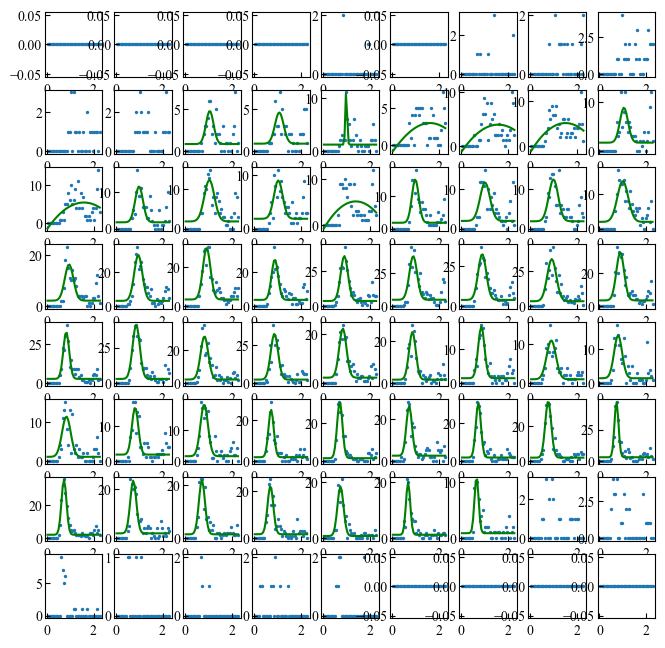

In [132]:
ax = plot_gauss_fits(yedges=barrier_y_mesh[:, 0], hist2d=barrier_hist2d_all, popts=barrier_popts_all, perrs=barrier_perrs_all, nrows=8, ncols=9, figsize=utils.cm2inch(20, 20))
plt.show()

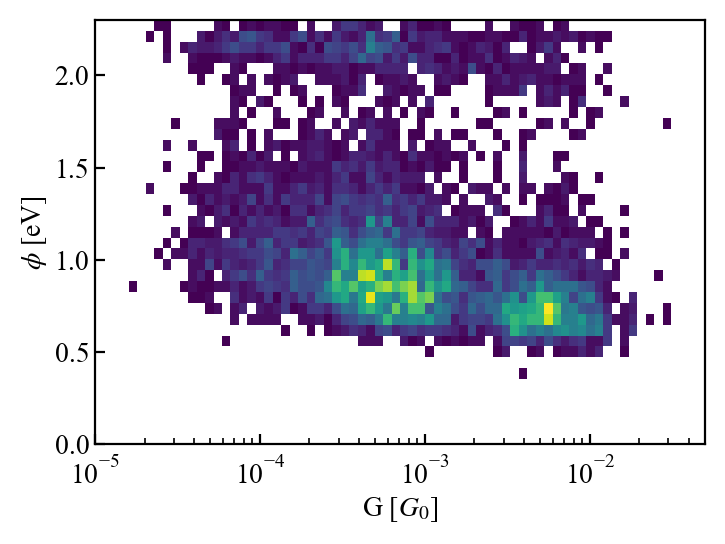

In [133]:
ax = plot_2dhist(barrier_x_mesh, barrier_y_mesh, barrier_hist2d_all, figsize=utils.cm2inch(10, 7), my_cmap=None, dpi=200)
ax.set_xscale('log')
ax.set_xlabel(r'G [$G_{0}$]')
ax.set_ylabel(r'$\phi$ [eV]')

xmiddle = barrier_x_mesh[0, :][:-1] + np.diff(barrier_x_mesh[0, :])/2

# ax.plot(xmiddle, barrier_popts_all[:, 2]-abs(barrier_popts_all[:, 3]/2), c='white', ls='--', lw=0.7)
# ax.plot(xmiddle, barrier_popts_all[:, 2]+abs(barrier_popts_all[:, 3]/2), c='white', ls='--', lw=0.7)
# ax.plot(xmiddle, barrier_popts_all[:, 2], c='white')

Text(0, 0.5, '$\\phi$ [eV]')

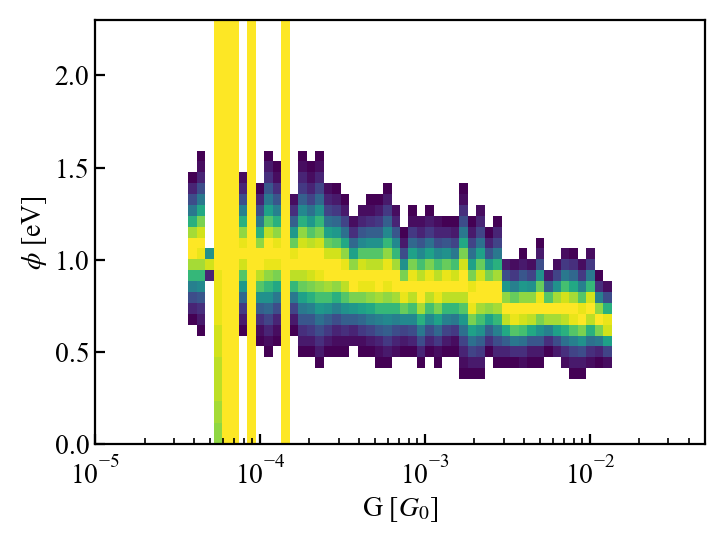

In [134]:
ax = plot_2dhist(barrier_x_mesh, barrier_y_mesh, barrier_hist2d_all_norm, figsize=utils.cm2inch(10, 7), my_cmap=None, dpi=200)
ax.set_xscale('log')
xmiddle = barrier_x_mesh[0, :][:-1] + np.diff(barrier_x_mesh[0, :])/2
# ax.fill_between(xmiddle, popts_norm_all[:, 2]-abs(popts_norm_all[:, 3]/2), popts_norm_all[:, 2]+abs(popts_norm_all[:, 3]/2), color='white', alpha=0.5, edgecolor='orange')
# ax.plot(xmiddle, barrier_popts_norm_all[:, 2]-abs(barrier_popts_norm_all[:, 3]/2), c='white', ls='--', lw=0.7)
# ax.plot(xmiddle, barrier_popts_norm_all[:, 2]+abs(barrier_popts_norm_all[:, 3]/2), c='white', ls='--', lw=0.7)
# ax.plot(xmiddle, barrier_popts_norm_all[:, 2], c='white')
ax.set_xlabel(r'G [$G_{0}$]')
ax.set_ylabel(r'$\phi$ [eV]')

In [135]:
# tunnel_pull_data, tunnel_pull_fits

gap_x_mesh, gap_y_mesh, gap_hist2d_all =\
    calc_2dhist_from_df(data=tunnel_pull_fits, x_col='G_meas_mean [G0]', y_col='z -Gap [nm]',
                        xrange = (1e-5, 5e-2), yrange = (0, 1), num_bins = (20, 40), log_scale=(True, False))

gap_popts_all, gap_perrs_all, gap_popts_norm_all = fitgauss2hist(yedges=gap_y_mesh[:, 0], hist2d=gap_hist2d_all, log_y=False)

gap_hist2d_all_norm = calc_norm_2dhist(gap_y_mesh[:, 0], gap_hist2d_all, gap_popts_norm_all, log_y=False)

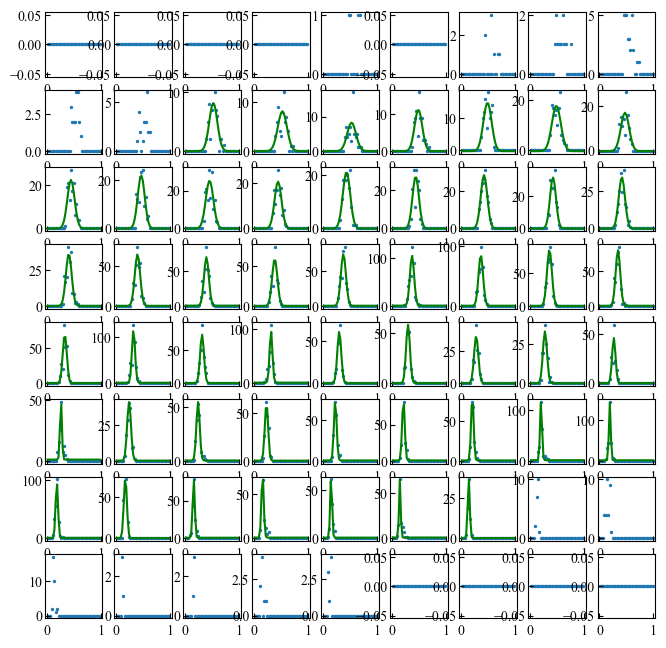

In [136]:
ax = plot_gauss_fits(yedges=gap_y_mesh[:, 0], hist2d=gap_hist2d_all, popts=gap_popts_all, perrs=gap_perrs_all, nrows=8, ncols=9, figsize=utils.cm2inch(20, 20))
plt.show()

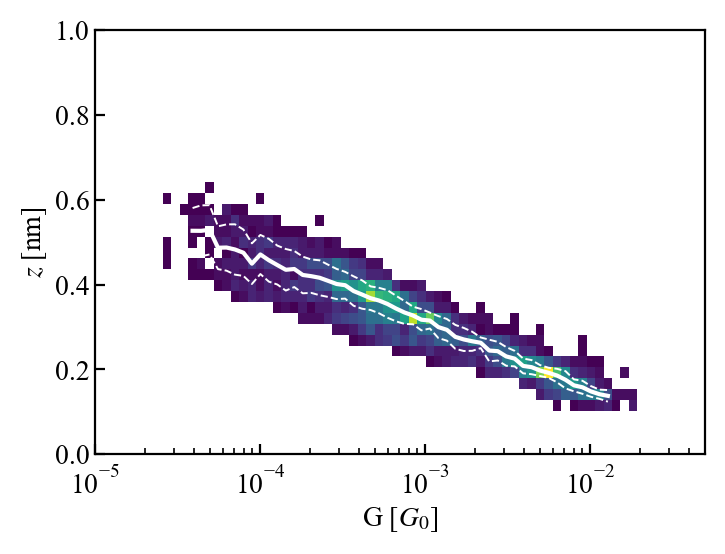

In [137]:
ax = plot_2dhist(gap_x_mesh, gap_y_mesh, gap_hist2d_all, figsize=utils.cm2inch(10, 7), my_cmap=None, dpi=200)
ax.set_xscale('log')
ax.set_xlabel(r'G [$G_{0}$]')
ax.set_ylabel(r'$z$ [nm]')

xmiddle = gap_x_mesh[0, :][:-1] + np.diff(gap_x_mesh[0, :])/2

ax.plot(xmiddle, gap_popts_all[:, 2]-abs(gap_popts_all[:, 3]/2), c='white', ls='--', lw=0.7)
ax.plot(xmiddle, gap_popts_all[:, 2]+abs(gap_popts_all[:, 3]/2), c='white', ls='--', lw=0.7)
ax.plot(xmiddle, gap_popts_all[:, 2], c='white')

Text(0, 0.5, '$z$ [nm]')

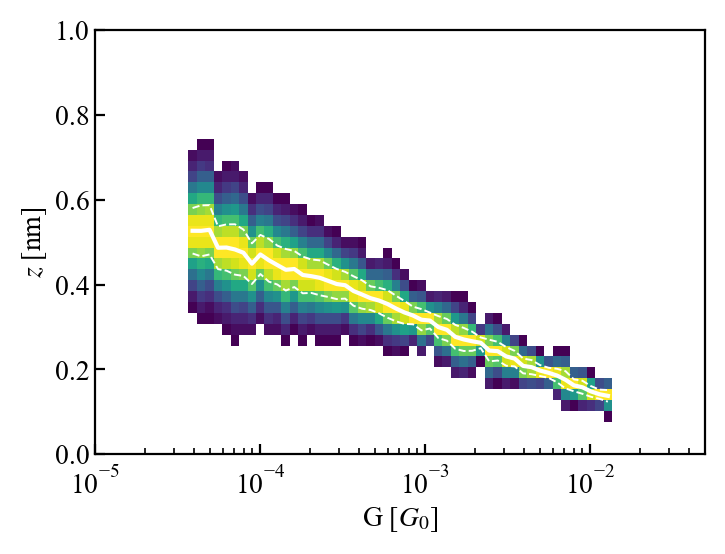

In [138]:
ax = plot_2dhist(gap_x_mesh, gap_y_mesh, gap_hist2d_all_norm, figsize=utils.cm2inch(10, 7), my_cmap=None, dpi=200)
ax.set_xscale('log')
xmiddle = gap_x_mesh[0, :][:-1] + np.diff(gap_x_mesh[0, :])/2
# ax.fill_between(xmiddle, popts_norm_all[:, 2]-abs(popts_norm_all[:, 3]/2), popts_norm_all[:, 2]+abs(popts_norm_all[:, 3]/2), color='white', alpha=0.5, edgecolor='orange')
ax.plot(xmiddle, gap_popts_norm_all[:, 2]-abs(gap_popts_norm_all[:, 3]/2), c='white', ls='--', lw=0.7)
ax.plot(xmiddle, gap_popts_norm_all[:, 2]+abs(gap_popts_norm_all[:, 3]/2), c='white', ls='--', lw=0.7)
ax.plot(xmiddle, gap_popts_norm_all[:, 2], c='white')
ax.set_xlabel(r'G [$G_{0}$]')
ax.set_ylabel(r'$z$ [nm]')

In [322]:
tunnel_pull_fits['Phi - Barrier [eV]'].min()

0.27

In [326]:
tunnel_pull_fits

Trace                   Fit Trace     R [Ohm]  z -Gap [nm]  \
0      19522  '1_IV_trace_19522_pull_pl'  13069957.0         0.32   
1      19811  '1_IV_trace_19811_pull_pl'   3730296.1         0.21   
2      19877  '1_IV_trace_19877_pull_pl'   2902911.0         0.18   
3      19905  '1_IV_trace_19905_pull_pl'   1973310.2         0.18   
4      19998  '1_IV_trace_19998_pull_pl'   4073626.3         0.20   
...      ...                         ...         ...          ...   
10046  48310  '4_IV_trace_48310_pull_pl'   6225924.1         0.26   
10048  48398  '4_IV_trace_48398_pull_pl'  34443797.0         0.38   
10049  48428  '4_IV_trace_48428_pull_pl'  37522937.0         0.40   
10050  48454  '4_IV_trace_48454_pull_pl'  89495813.0         0.46   
10055  49042  '4_IV_trace_49042_pull_pl'  19203370.0         0.32   

       Phi - Barrier [eV]         dR/dz       dR/dPhi  G_meas1 [G0]  \
0                    0.77  1.563003e+17  1.099730e+26      0.002974   
1                    0.92  5.156197e+16  1.692375e+25      0.005064   
2                    1.20  4.417911e+16  1.010583e+25      0.006574   
3                    0.59  2.518796e+16  1.007219e+25      0.011038   
4                    1.26  6.184412e+16  1.569335e+25      0.005919   
...                   ...           ...           ...           ...   
10046                0.76  7.803852e+16  4.135728e+25      0.003078   
10048                0.95  4.247076e+17  3.119891e+26      0.000517   
10049                0.85  4.385418e+17  3.761594e+26      0.000720   
10050                0.95  1.058251e+18  1.016501e+27      0.000358   
10055                1.09  2.580173e+17  1.349476e+26      0.001002   

       dG/G_meas1  G_meas2 [G0]  dG/G_meas2  IV part  R_meas1 [Ohm]  \
0        0.085796      0.001155    0.143681        1   4.337060e+06   
1        0.107289      0.002731    0.043851        1   2.547255e+06   
2        0.035293      0.004031    0.025566        1   1.962315e+06   
3        0.055643      0.007856    0.023391        1   1.168684e+06   
4        0.052609      0.002665    0.054060        1   2.179493e+06   
...           ...           ...         ...      ...            ...   
10046    0.042914      0.002804    0.046015        4   4.190597e+06   
10048    0.045703      0.000481    0.089730        4   2.493787e+07   
10049    0.065545      0.000350    0.047816        4   1.791217e+07   
10050    0.075724      0.000124    0.081056        4   3.606515e+07   
10055    0.032493      0.000760    0.021734        4   1.287729e+07   

       R_meas2 [Ohm]  R_meas_mean [Ohm]  G_meas_mean [G0]  Condition  
0       1.116501e+07       7.751036e+06          0.002065       True  
1       4.722917e+06       3.635086e+06          0.003898       True  
2       3.200030e+06       2.581172e+06          0.005303       True  
3       1.642018e+06       1.405351e+06          0.009447       True  
4       4.840504e+06       3.509998e+06          0.004292       True  
...              ...                ...               ...        ...  
10046   4.600504e+06       4.395550e+06          0.002941       True  
10048   2.684245e+07       2.589016e+07          0.000499       True  
10049   3.690183e+07       2.740700e+07          0.000535       True  
10050   1.036464e+08       6.985578e+07          0.000241       True  
10055   1.696817e+07       1.492273e+07          0.000881       True  

[6596 rows x 17 columns]

In [323]:
tunnel_pull_fits_filt.groupby('Trace').mean().columns

Index(['R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]', 'dR/dz', 'dR/dPhi',
       'G_meas1 [G0]', 'dG/G_meas1', 'G_meas2 [G0]', 'dG/G_meas2', 'IV part',
       'R_meas1 [Ohm]', 'R_meas2 [Ohm]', 'R_meas_mean [Ohm]',
       'G_meas_mean [G0]', 'Condition'],
      dtype='object')

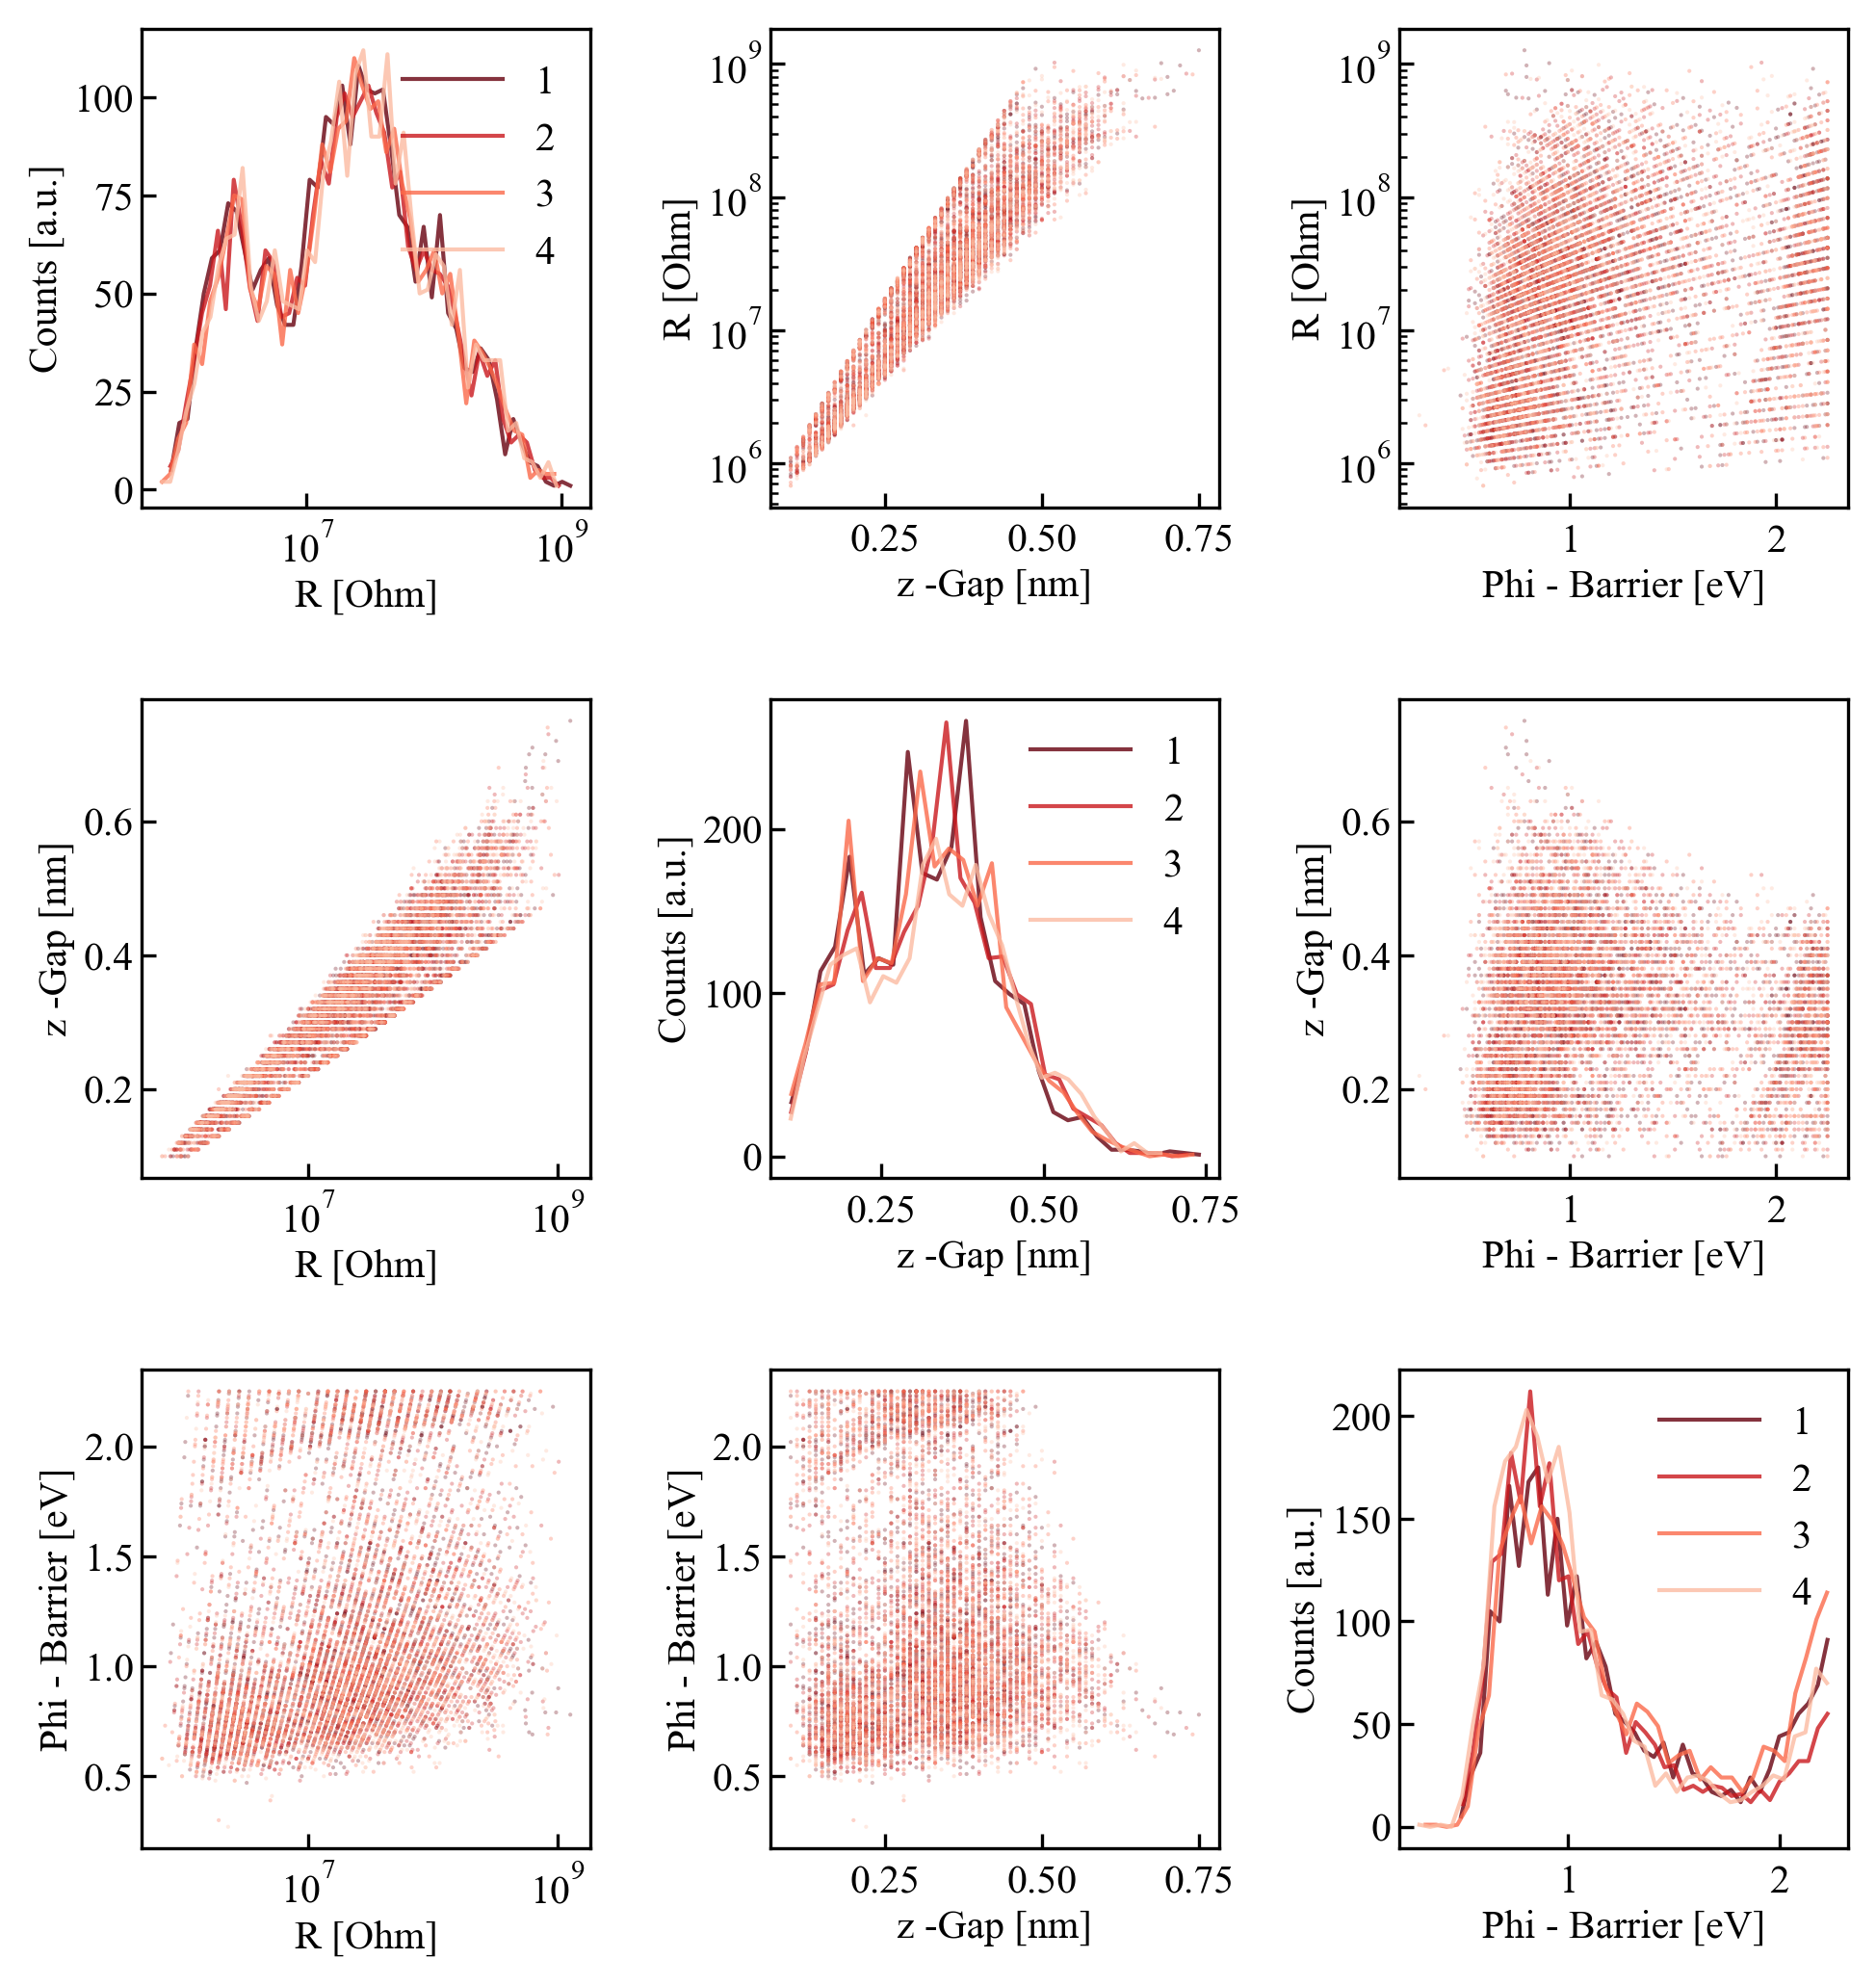

In [141]:
axs = scatter_plot_matrix(data=tunnel_pull_fits, col_names=('R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]'), set_log=(True, False, False), hue='IV part',
                          figsize=utils.cm2inch((20, 20)), dpi=300, s=1, edgecolor='None', alpha=0.3, bins_num=(50, 30, 40), cmap_reversed=True)

In [60]:
# tunnel_pull_fits_filt.groupby('Trace').get_group(20092)

In [55]:
tunnel_pull_fits_filt.groupby('Trace').mean()

R [Ohm]  z -Gap [nm]  Phi - Barrier [eV]         dR/dz  \
Trace                                                                
20092  8.235155e+06       0.2750              0.8625  1.060665e+17   
20517  1.354964e+06       0.1475              0.6700  1.843468e+16   
20518  9.615626e+05       0.1225              0.6650  1.342126e+16   
20527  5.149306e+06       0.2375              0.8675  6.824072e+16   
20529  1.098552e+06       0.1300              0.7400  1.549922e+16   
...             ...          ...                 ...           ...   
47313  2.158891e+07       0.3450              0.9300  2.679044e+17   
48223  8.185159e+07       0.4725              0.8400  9.099283e+17   
48283  2.283514e+08       0.4975              1.2350  2.914742e+18   
48454  9.016946e+07       0.4850              0.8125  9.922490e+17   
49042  1.767698e+07       0.3225              0.9900  2.296254e+17   

            dR/dPhi  G_meas1 [G0]  dG/G_meas1  G_meas2 [G0]  dG/G_meas2  \
Trace                                                                     
20092  5.302320e+25      0.004061    0.127587      0.001534    0.069357   
20517  4.528422e+24      0.010731    0.031222      0.012714    0.019314   
20518  2.604358e+24      0.014985    0.018039      0.017040    0.014219   
20527  2.823753e+25      0.002435    0.027649      0.004244    0.019748   
20529  3.095655e+24      0.009402    0.040536      0.014225    0.012805   
...             ...           ...         ...           ...         ...   
47313  1.814508e+26      0.001113    0.039496      0.000570    0.036876   
48223  1.027878e+27      0.000501    0.077991      0.000159    0.066896   
48283  2.608462e+27      0.000060    0.057851      0.000070    0.056159   
48454  1.177250e+27      0.000358    0.075724      0.000124    0.081056   
49042  1.297259e+26      0.001002    0.032493      0.000760    0.021734   

       IV part  R_meas1 [Ohm]  R_meas2 [Ohm]  R_meas_mean [Ohm]  \
Trace                                                             
20092      2.5   3.176642e+06   8.410394e+06       5.793518e+06   
20517      2.5   1.202143e+06   1.014645e+06       1.108394e+06   
20518      2.5   8.608826e+05   7.570629e+05       8.089727e+05   
20527      2.5   5.297717e+06   3.039647e+06       4.168682e+06   
20529      2.5   1.372021e+06   9.068641e+05       1.139443e+06   
...        ...            ...            ...                ...   
47313      2.5   1.158530e+07   2.261888e+07       1.710209e+07   
48223      2.5   2.573963e+07   8.093946e+07       5.333955e+07   
48283      2.5   2.148988e+08   1.851495e+08       2.000242e+08   
48454      2.5   3.606515e+07   1.036464e+08       6.985578e+07   
49042      2.5   1.287729e+07   1.696817e+07       1.492273e+07   

       G_meas_mean [G0]  Condition  
Trace                               
20092          0.002797        1.0  
20517          0.011722        1.0  
20518          0.016012        1.0  
20527          0.003339        1.0  
20529          0.011814        1.0  
...                 ...        ...  
47313          0.000842        1.0  
48223          0.000330        1.0  
48283          0.000065        1.0  
48454          0.000241        1.0  
49042          0.000881        1.0  

[882 rows x 15 columns]

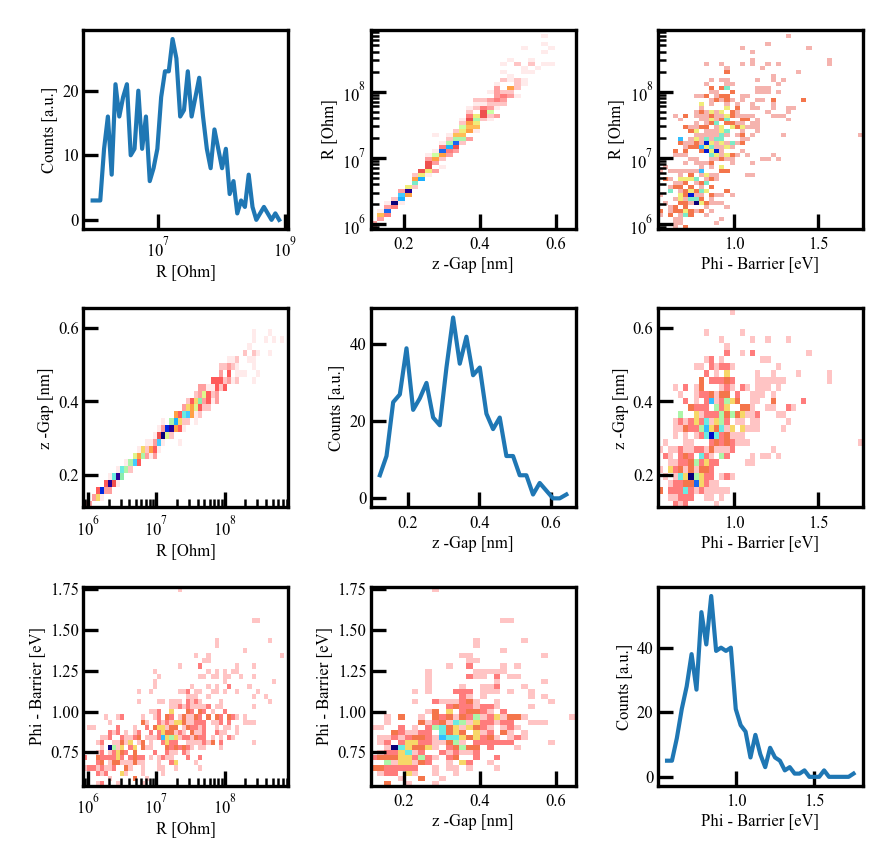

In [511]:
select_columns = ('R [Ohm]', 'z -Gap [nm]', 'Phi - Barrier [eV]')

axs =  hist_2d_plot_matrix(data = tunnel_pull_fits_filt.groupby('Trace').mean(), col_names=select_columns,
                           set_log=(True, False, False), dpi=300, bins_num=(50, 30, 40))